# Visualizaciones promediadas anualmente

En este script veremos distintos gráficos con el objetivo de ver el comportamiento de las distintas variables entre sí, así como mostrar estadísticas descriptivas.

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib import ticker
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import seaborn as sns
import plotly
import warnings
import os
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
print('Modulos importados')

Modulos importados


In [2]:
# Configuraciones
warnings.filterwarnings('ignore')
# Reduzcamos el número de línea a leer
pd.options.display.max_rows = 5

In [3]:
# Directorio de trabajo
print("Directorio de trabajo previo: " + str(os.getcwd()))
# Cambiemoslo
os.chdir('/home/usuario/Documentos/Github/Proyectos/MLB_HN/')

Directorio de trabajo previo: /home/usuario/Documentos/Github/Proyectos/MLB_HN/Visualizations/Notebooks/Descriptive_Statistics


In [4]:
# Veamos el directorio actual de trabajo
print(os.getcwd())
# El directorio anterior es el correcto, pero si no lo fuese, hacemos lo sigueinte:
path = '/home/usuario/Documentos/Github/Proyectos/MLB_HN'
print("Nuevo directorio de trabajo: " + str(os.chdir(path)))

/home/usuario/Documentos/Github/Proyectos/MLB_HN
Nuevo directorio de trabajo: None


## Estadísticas descriptivas de acuerdo a la agencia libre

### Cumulativas

Primero, veremos las estadísticas que engloban datos generales para observar si hay diferencia entre agentes libres y los que no lo son.

In [5]:
panel_hitter_path = 'ETL_Data/Per_Game/Panel/Hitter/visual_panel' + '.csv'
panel_pitcher_path = 'ETL_Data/Per_Game/Panel/Pitcher/visual_panel' + '.csv'

In [6]:
df_panel_hitter = pd.read_csv(panel_hitter_path)
df_panel_pitcher = pd.read_csv(panel_pitcher_path)

Veamos el contenido de las bases de datos

In [7]:
df_panel_hitter.head()

acronimo agente_libre    altura  anio  anio_de_agente_libre  \
0      MIL           No  6.241571  2011                  2013   
1      MIL           No  6.000000  2011                     0   
2      MIL           No  6.000000  2011                     0   
3      MIL           No  6.300000  2011                     0   
4      MIL           No  6.000000  2011                     0   

   anios_de_contrato  antiguedad  at-bats  at-bats_2  bateos  ...  \
0                  3           1     1.85     3.4225    0.30  ...   
1                  1           0     0.28     0.0784    0.07  ...   
2                  3           3     0.03     0.0009    0.01  ...   
3                  1           0     1.63     2.6569    0.27  ...   
4                  1           0     0.33     0.1089    0.00  ...   

   sueldo_regular  triples  triples_2   tvs   tvs_2  valor_contrato_promedio  \
0         9500000      0.0        0.0  1.32  1.7424                  9916667   
1          414000      0.0        0.0  0.36  0.1296                   414000   
2        12166667      0.0        0.0  0.13  0.0169                 12333333   
3          444150      0.0        0.0  0.00  0.0000                   444150   
4          414000      0.0        0.0  0.00  0.0000                   414000   

   valor_contrato_total  valor_del_contrato  victorias  ws ganadas  
0                775000            29750000         96           0  
1                775000              414000         96           0  
2                775000            37000000         96           0  
3                775000              444150         96           0  
4                775000              414000         96           0  

[5 rows x 64 columns]

In [8]:
df_panel_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 64 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   acronimo                              3092 non-null   object 
 1   agente_libre                          3092 non-null   object 
 2   altura                                3092 non-null   float64
 3   anio                                  3092 non-null   int64  
 4   anio_de_agente_libre                  3092 non-null   int64  
 5   anios_de_contrato                     3092 non-null   int64  
 6   antiguedad                            3092 non-null   int64  
 7   at-bats                               3092 non-null   float64
 8   at-bats_2                             3092 non-null   float64
 9   bateos                                3092 non-null   float64
 10  bateos_2                              3092 non-null   float64
 11  bateos_promedio  

In [9]:
df_panel_pitcher.head()

acronimo agente_libre  altura  anio  anio_de_agente_libre  \
0      CIN           No  6.2415  2012                     0   
1      CIN           No  6.2415  2011                     0   
2      MIA           No  6.7000  2012                  2014   
3      CHW           No  6.4000  2012                     0   
4      CHW           No  6.4000  2011                     0   

   anios_de_contrato  antiguedad  bateos  bateos_2  bono_por_firma  ...  \
0                  1           0    5.74   32.9476               0  ...   
1                  1           0    5.74   32.9476               0  ...   
2                  4           3    5.81   33.7561               0  ...   
3                  1           0    0.92    0.8464               0  ...   
4                  1           0    0.92    0.8464               0  ...   

   victorias  walks  walks_2  war  war_2  whip  whip_2  wins  wins_2  \
0         97   1.17   1.3689  NaN    NaN  0.04  0.0016  0.23  0.0529   
1         97   1.17   1.3689  NaN    NaN  0.04  0.0016  0.23  0.0529   
2         69   2.10   4.4100  NaN    NaN  0.04  0.0016  0.26  0.0676   
3         85   0.29   0.0841  NaN    NaN  0.02  0.0004  0.05  0.0025   
4         85   0.29   0.0841  NaN    NaN  0.02  0.0004  0.05  0.0025   

   ws ganadas  
0           5  
1           5  
2           2  
3           3  
4           3  

[5 rows x 71 columns]

In [10]:
df_panel_pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acronimo                 918 non-null    object 
 1   agente_libre             918 non-null    object 
 2   altura                   918 non-null    float64
 3   anio                     918 non-null    int64  
 4   anio_de_agente_libre     918 non-null    int64  
 5   anios_de_contrato        918 non-null    int64  
 6   antiguedad               918 non-null    int64  
 7   bateos                   918 non-null    float64
 8   bateos_2                 918 non-null    float64
 9   bono_por_firma           918 non-null    int64  
 10  cantidad de equipos      918 non-null    int64  
 11  cantidad_agentes_libres  918 non-null    int64  
 12  carreras                 918 non-null    float64
 13  carreras_2               918 non-null    float64
 14  carreras_ganadas         9

### Comparación entre jugadores normales y agentes libres

Primero, indiquemos qué variables son de interes para graficar, en este caso, las estadísticas deportivas que son propias tanto de los jugadores que son agentes libres como los que no lo son. Además, son de suma importancia graficar los salarios

In [11]:
hitter_statistics = ['at-bats', 'bateos_promedio', 'dobles',
                     'home-runs', 'porcentaje_on-base-plus-slugging',
                     'porcentaje_juegos', 'porcentaje_juegos_iniciados',
                     'porcentaje_on-base', 'porcentaje_slugging', 'runs-batted-in']
pitcher_statistics = ['bateos', 'carreras', 'carreras_ganadas',
                      'comando', 'control', 'dominio', 'inning_pitched',
                      'porcentaje_juegos', 'juegos_iniciados', 'losses', 'saves',
                      'strike-outs', 'whip', 'walks', 'wins']

In [12]:
hitter_labels = ['Al bate', 'Bateos promedio', 'Dobles',
                 'Home-runs', '%On-base-plus-slugging',
                 '%Partidos jugados', '%Juegos iniciados',
                 '%Embasado', '%Slugging', 'Carreras limpias']
pitcher_labels = ['Bateos permitidos', 'Carreras permitidas', 'Carreras ganadas',
                  'Comando', 'Control', 'Dominio', 'Inning pitched',
                  'Partidos jugados', 'Juegos iniciados', 'Losses', 'Salvamentos',
                  'Strike-outs', 'WHIP', 'Bases por bola permitidas', 'Wins']

In [13]:
hitter_labels_save = ['At-bats', 'Bateos promedio', 'Dobles',
                      'Home-runs', 'pOn-base-plus-slugging',
                      'pPartidos jugados', 'pJuegos iniciados',
                      'pOn-base', 'pSlugging', 'Runs-batted-in']
pitcher_labels_save = ['Bateos en contra', 'Carreras en contra', 'Carreras ganadas',
                       'Comando', 'Control', 'Dominio', 'Inning pitched',
                       'Partidos jugados', 'Juegos iniciados', 'Losses', 'Saves',
                       'Strike-outs', 'WHIP', 'Walks', 'Wins']

## Boxplots

Creemos las listas y diccionarios correspondientes

In [56]:
hitter_positions = [0.1, -0.3, 0.2, 0.4, -0.4,
                    0.05, 0.08, -0.25, -0.5, 0.2]
hitter_positions_adjustment = [0, 0.05, 0, 0, 0.15,
                               0, 0.045, 0.05, 0.1, 0]

In [49]:
# Estilos para los boxplots usando los kwargs para guardar los estilos de los distintos parámetros que componen el gráfico
kws_1 = {'boxprops':{'facecolor':(239/255,173/255,1/255,0.5),
                     'edgecolor':'black',
                     'linestyle':'solid',
                     'linewidth':3},
         'medianprops':{'color':'red',
                        'linewidth':3},
         'whiskerprops':{'color':'black'},
         'flierprops' :{'marker':'o',
                        'markerfacecolor':'#efad01',
                        'markersize':15,
                        'linewidth':5,
                        'markeredgecolor':'red'},
         'capprops':{'color':'black'}}

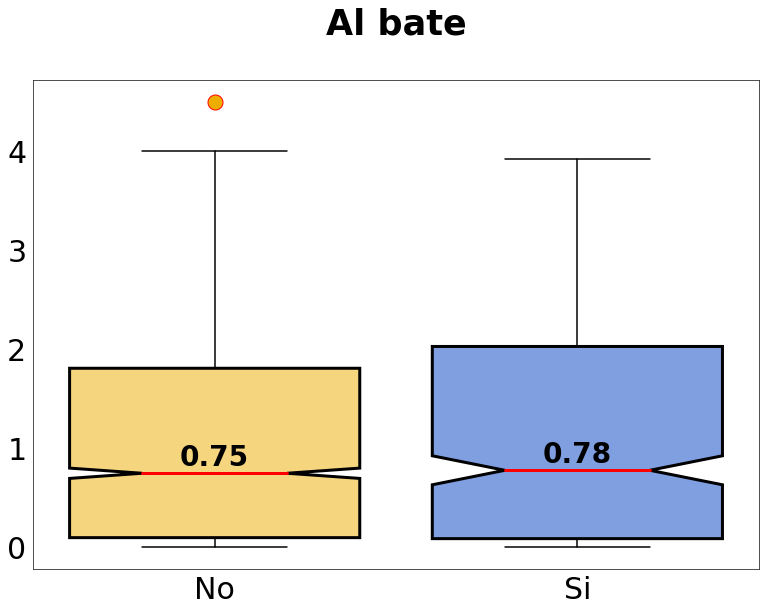

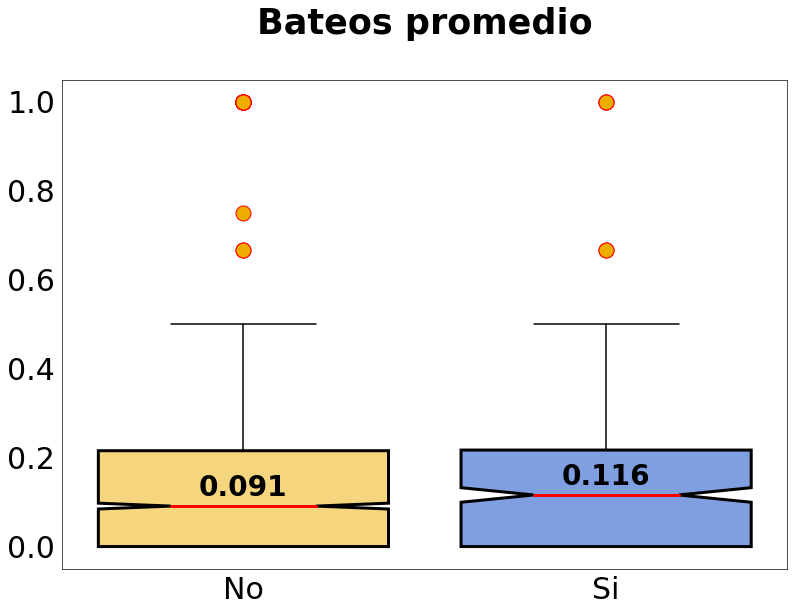

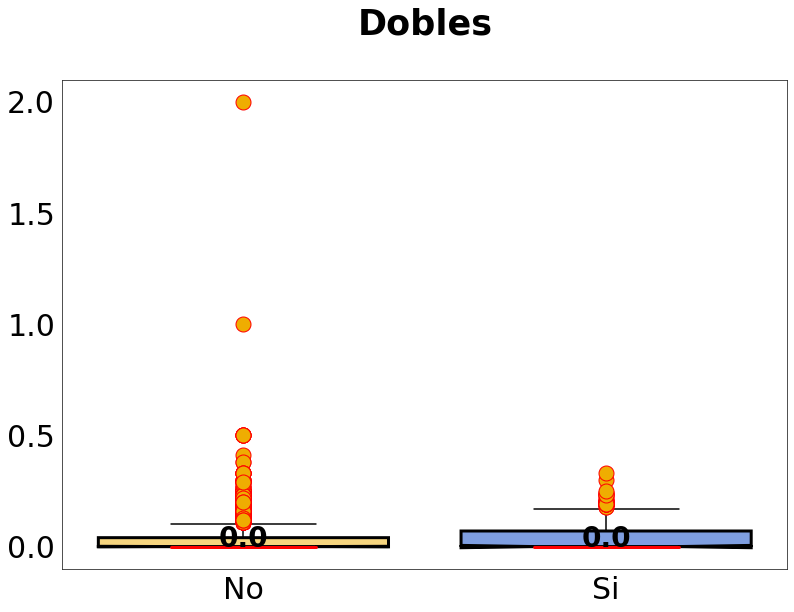

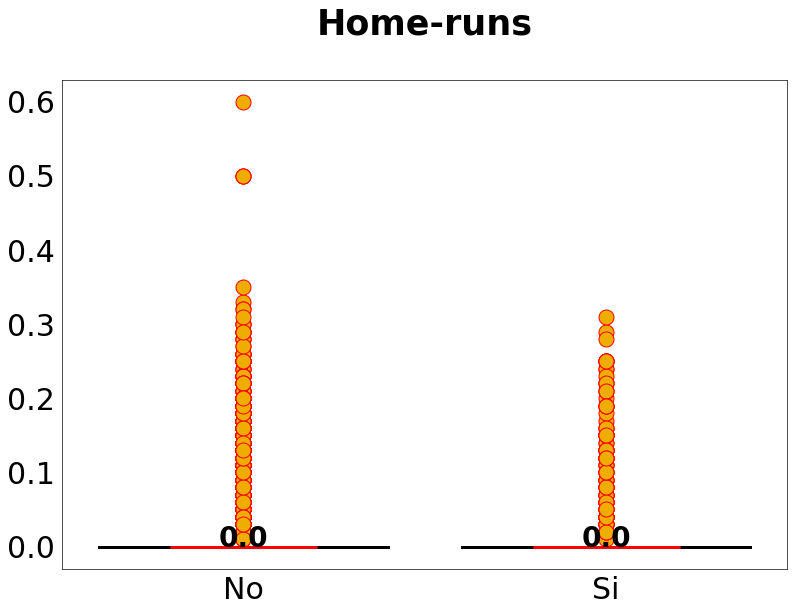

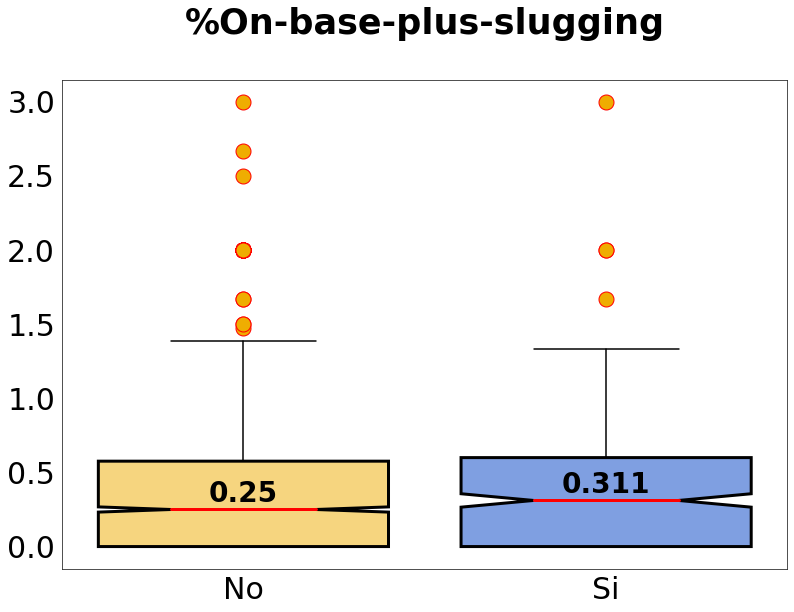

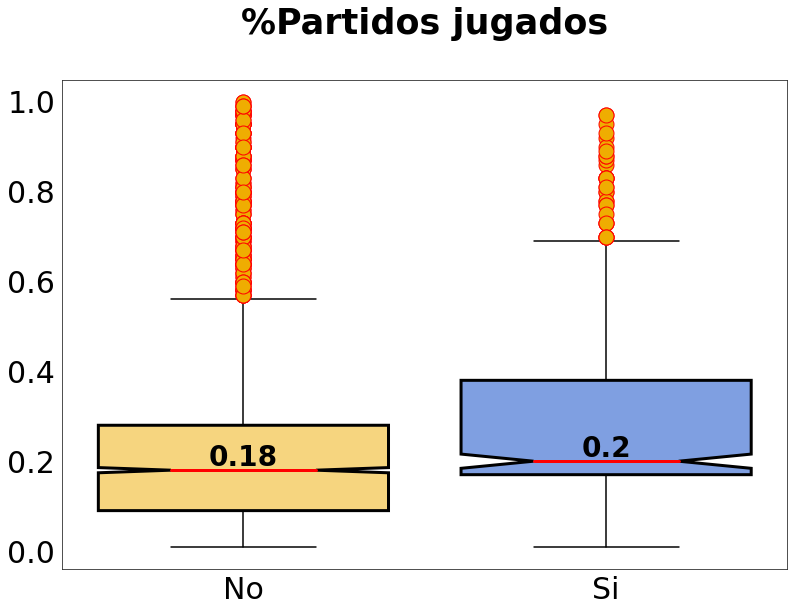

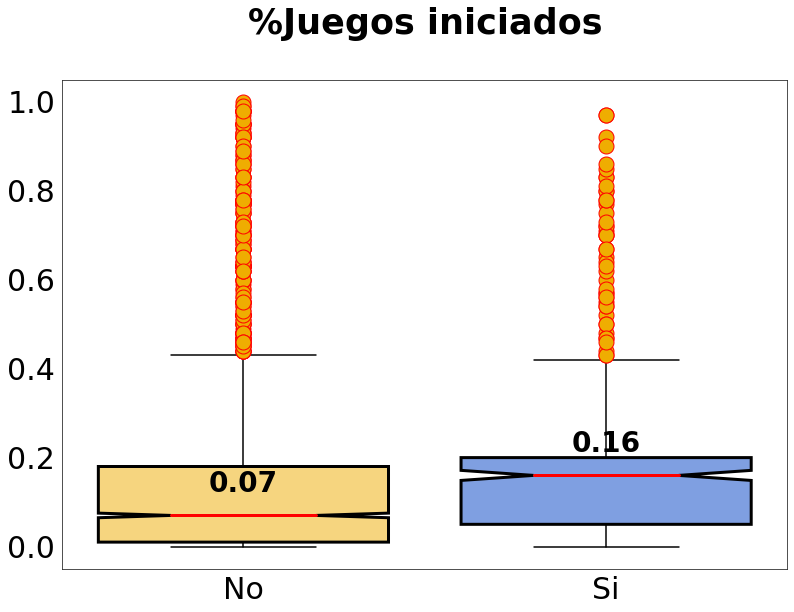

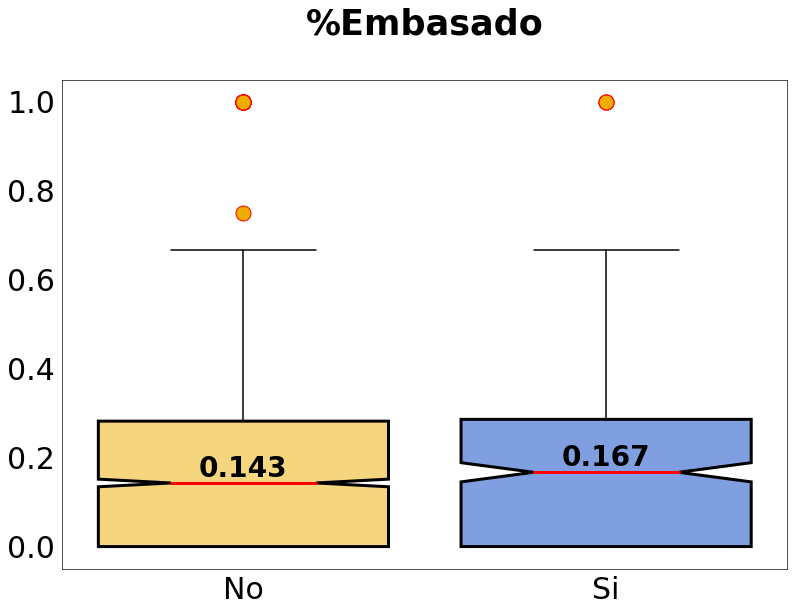

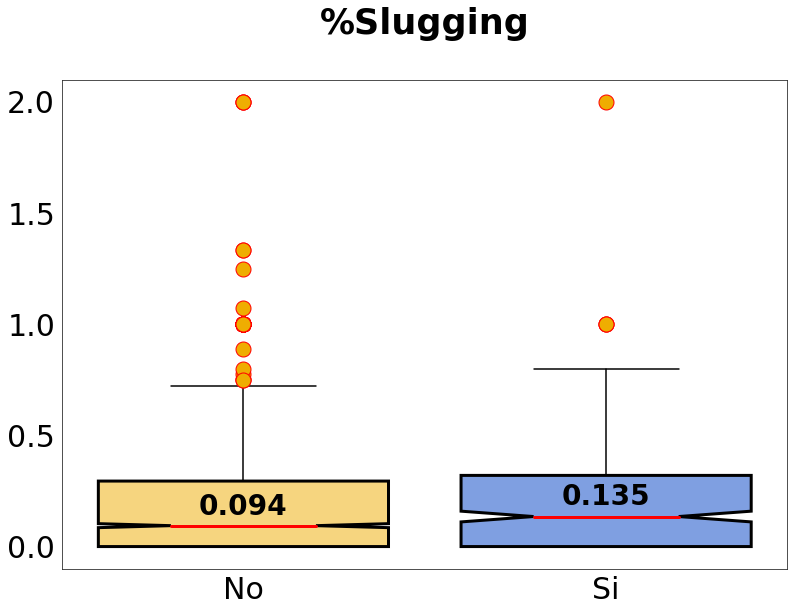

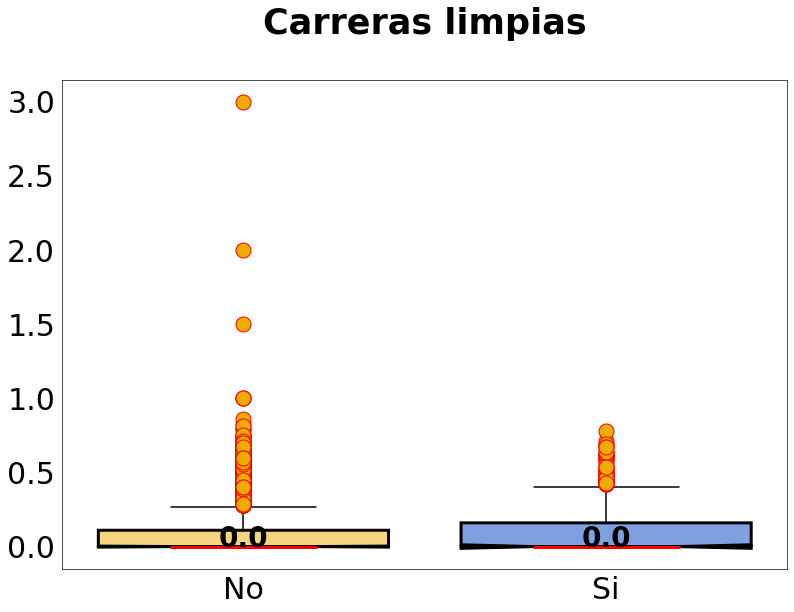

In [57]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_1 = sns.boxplot(x = 'agente_libre',
                      y = hitter_statistics[i],
                      data = df_panel_hitter, 
                      notch = True, 
                      **kws_1)
    g_1.set_title(hitter_labels[i] + '\n',
                  fontsize = 35,
                  fontweight = 'bold',
                  color = 'black')
    g_1.set_ylabel(hitter_labels[i],
                   fontsize = 26,
                   fontweight = 'bold',
                   color = 'black')
    g_1.set_xlabel('Agentes libres',
                   fontsize = 18,
                   fontweight = 'bold',
                   color = 'black')  
    g_1.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_1.set(xlabel = None)
    g_1.set(ylabel = None)
    """g_1.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.4)"""

    mybox = g_1.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_hitter.groupby(['agente_libre'])[hitter_statistics[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_hitter[hitter_statistics[i]].median()

    for xtick in g_1.get_xticks():
        g_1.text(xtick,
                 medians[xtick] + vertical_offset*hitter_positions[i]
                 + hitter_positions_adjustment[i],
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Boxplot/Per_Game/boxplot_hitter_" + str(hitter_labels_save[i]).lower() + ".pdf",
                format = "pdf")

In [109]:
pitcher_positions = [0.1, 0.2, 0.2, 0.5, -3,
                    0.23, 0.1, 0.1, 2,
                    0.05, 0.08, 0.1, -0.48, -1.73,
                    0.1]
pitcher_positions_adjustment = [0.7, 0.25, 0.35, 0.01, 0.06,
                                0.01, -0.6, 0, 0,
                                0, -1, 0, -.1, -.1,
                                0, 0]

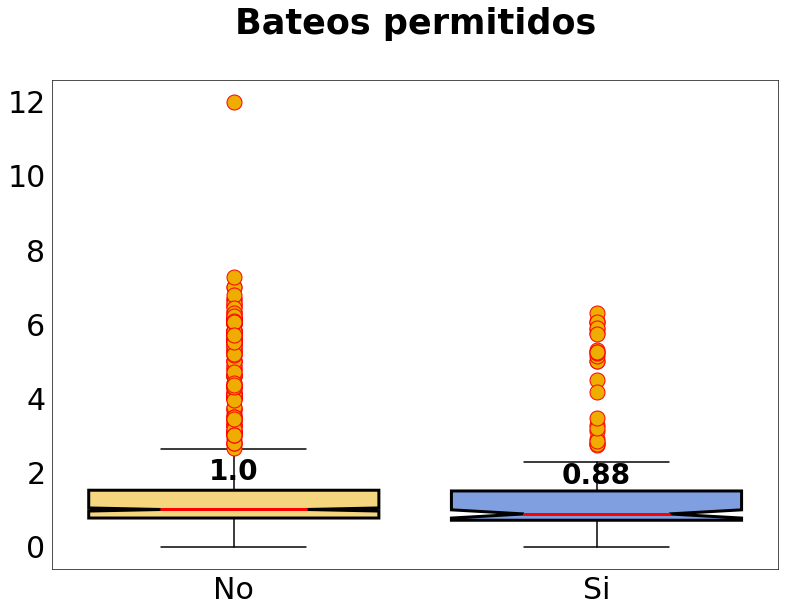

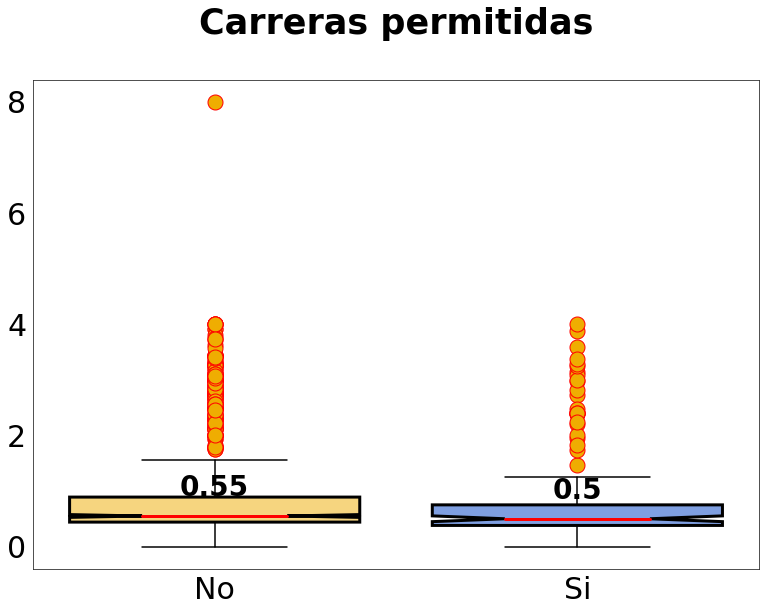

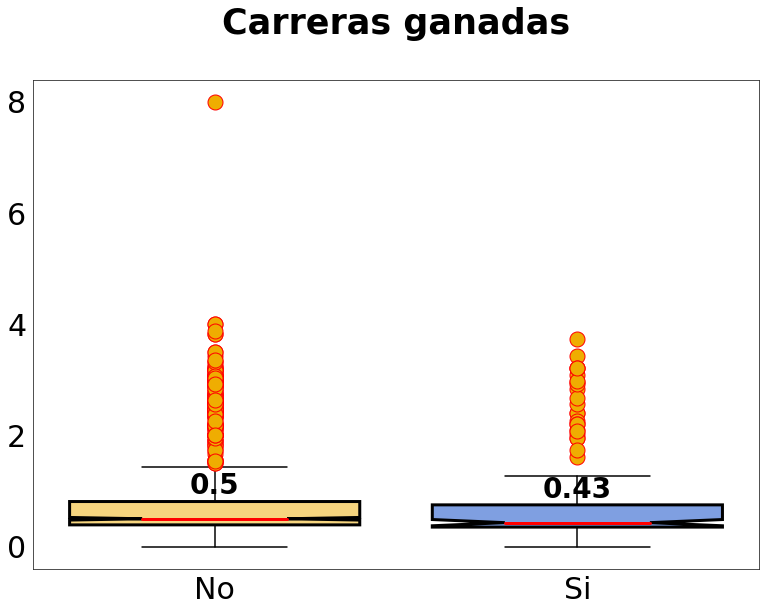

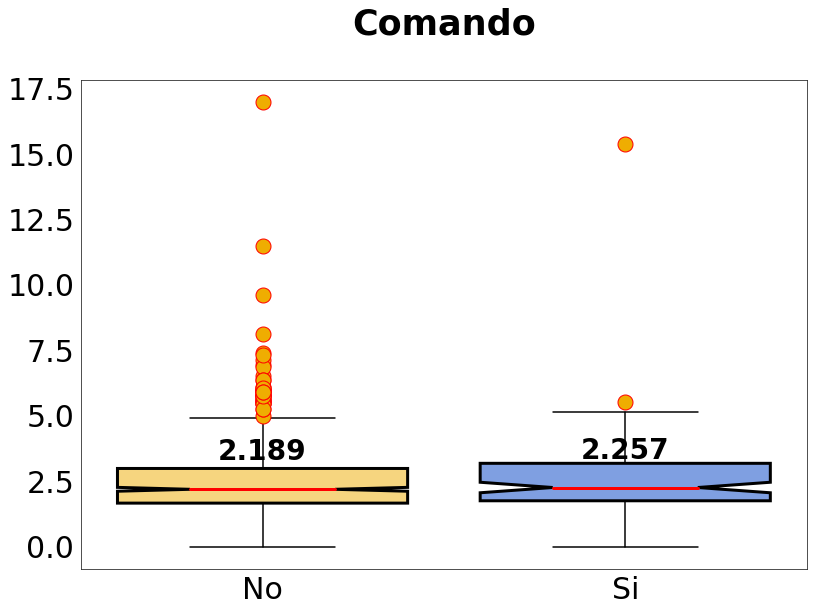

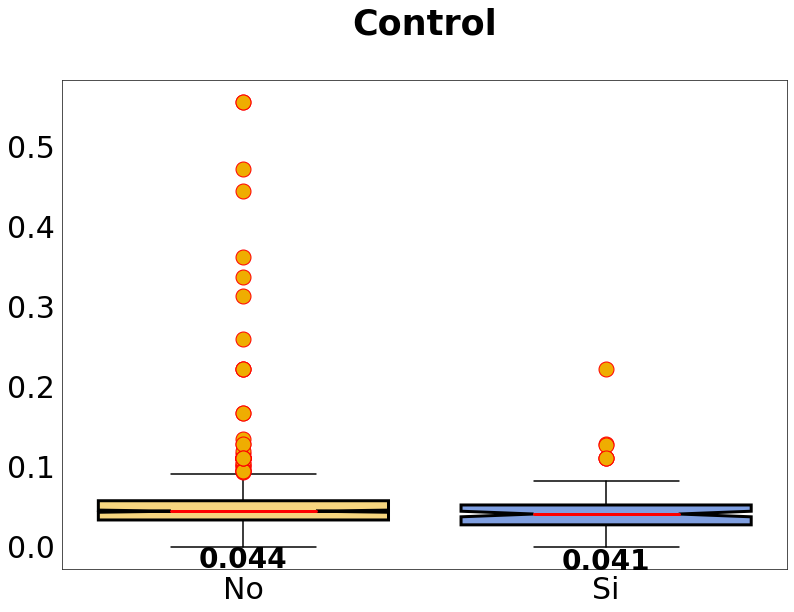

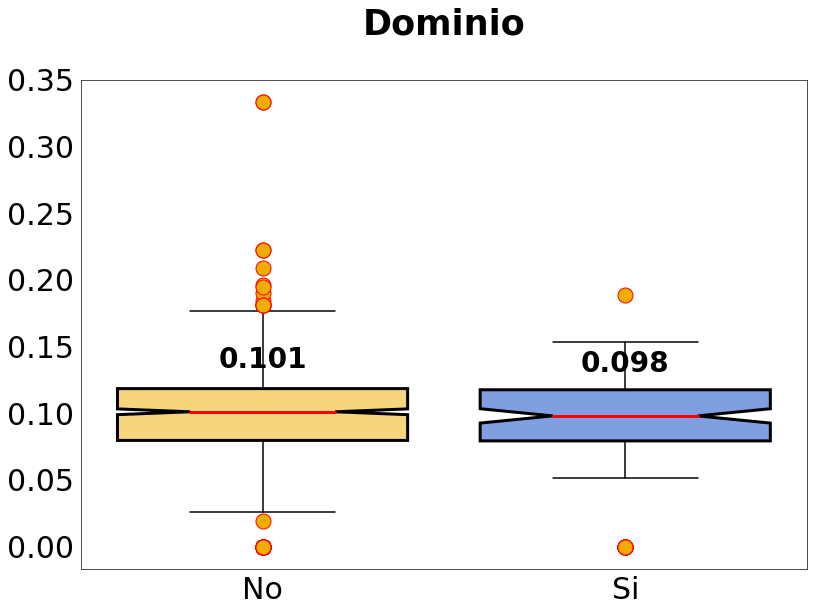

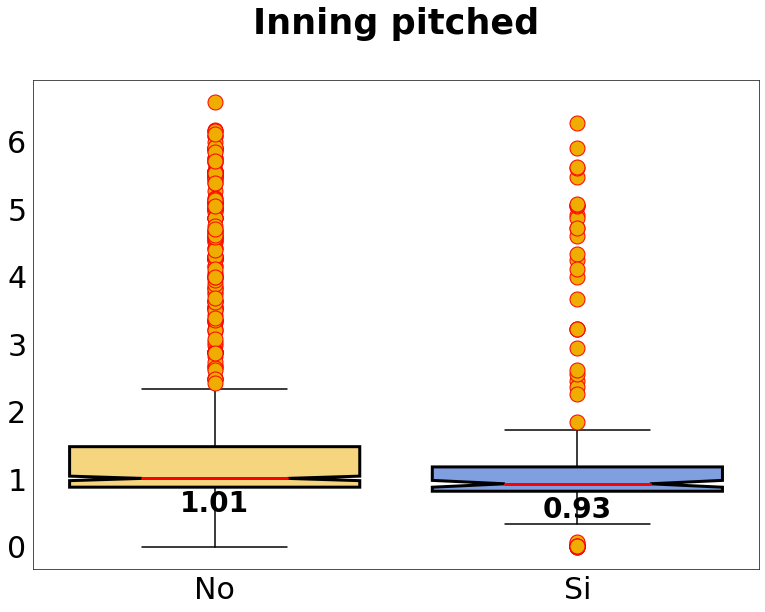

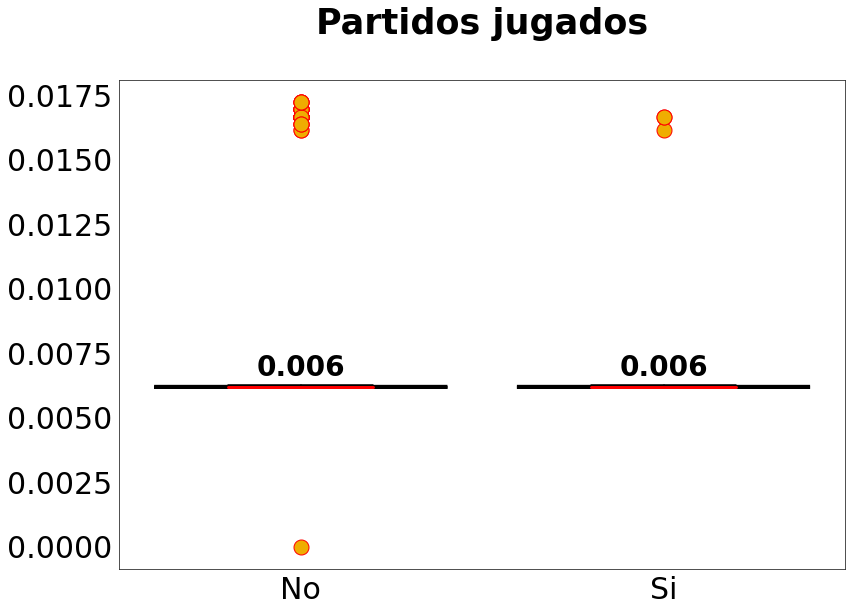

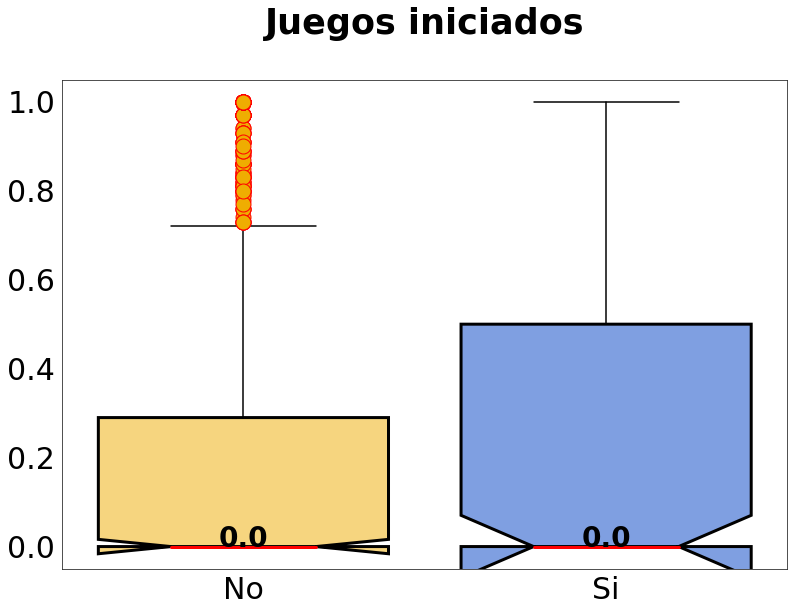

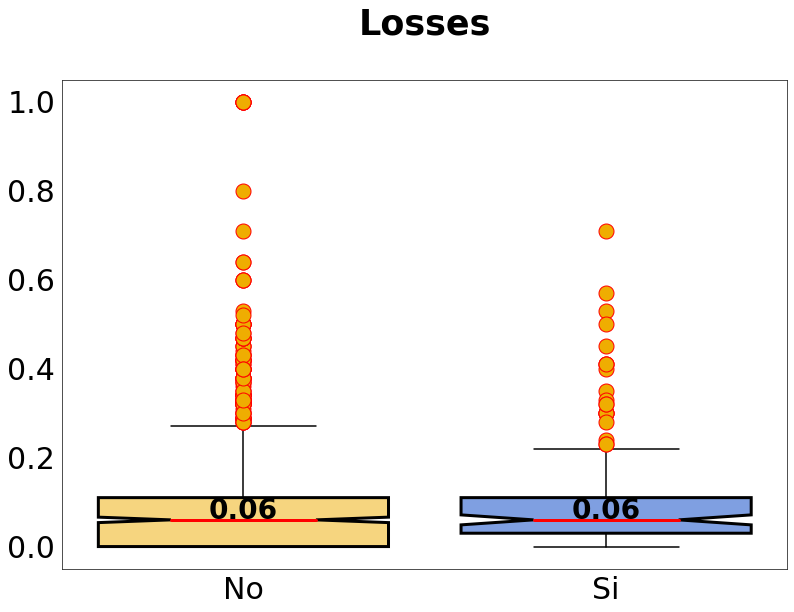

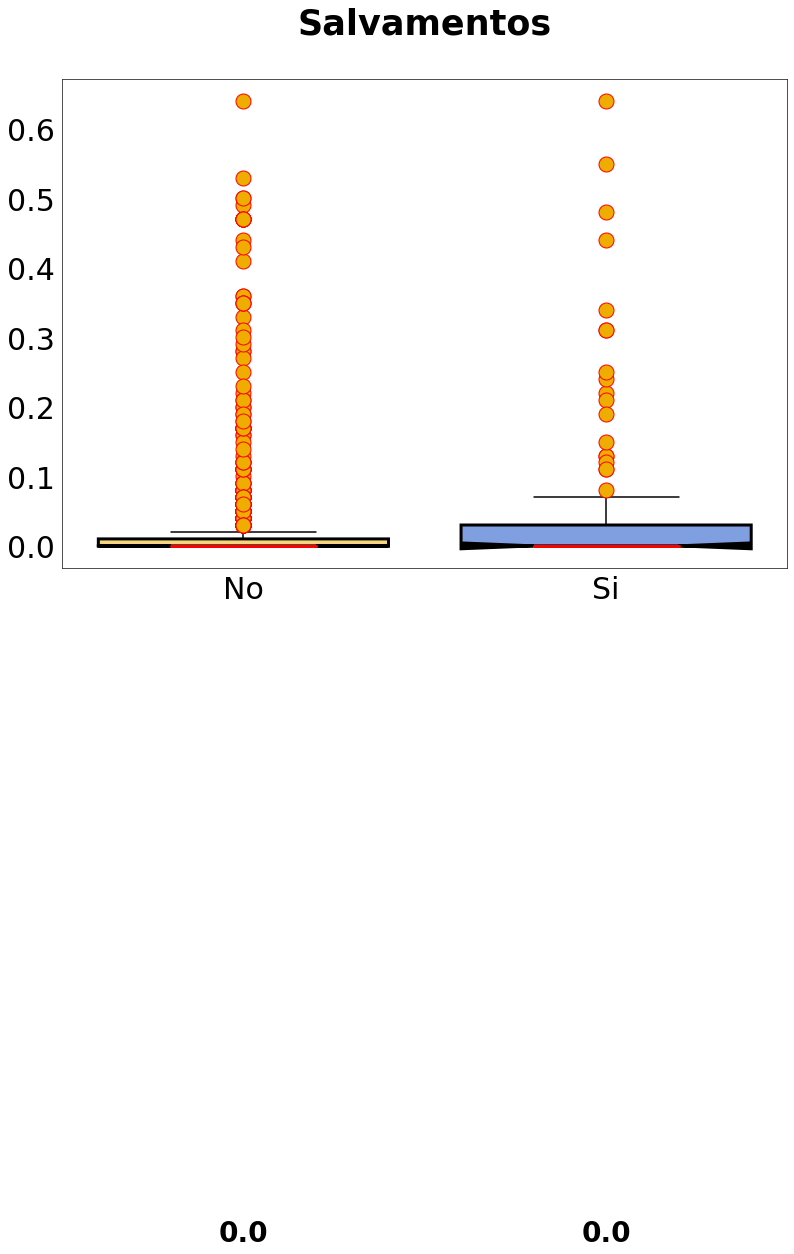

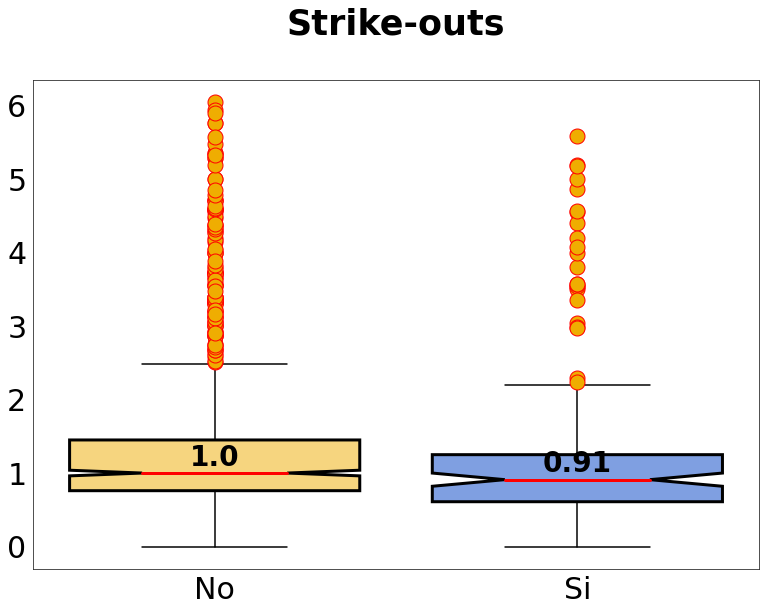

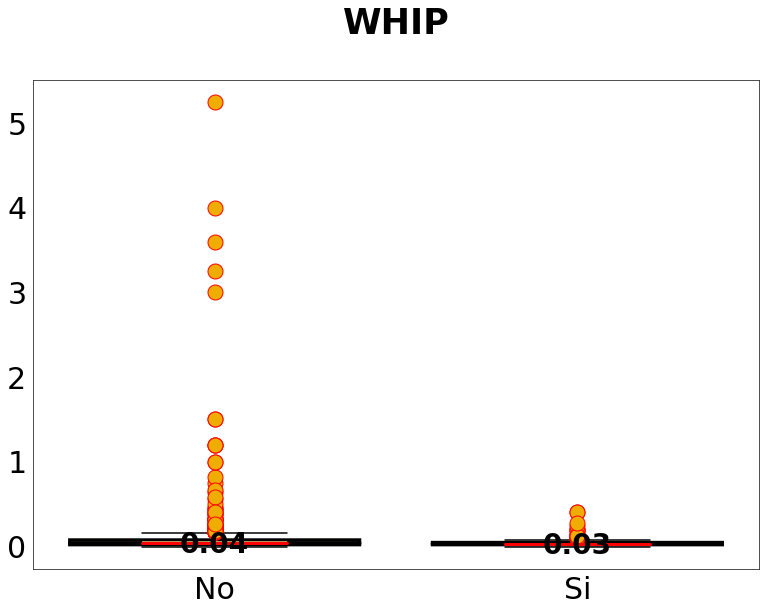

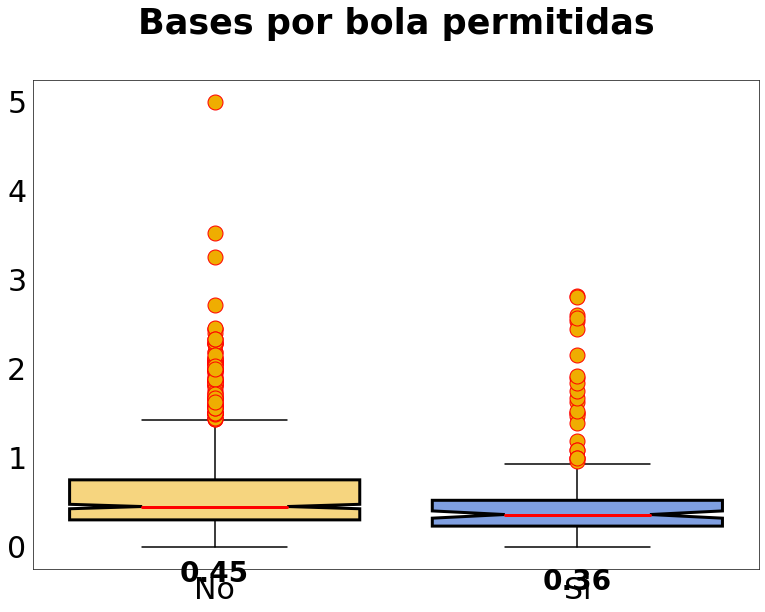

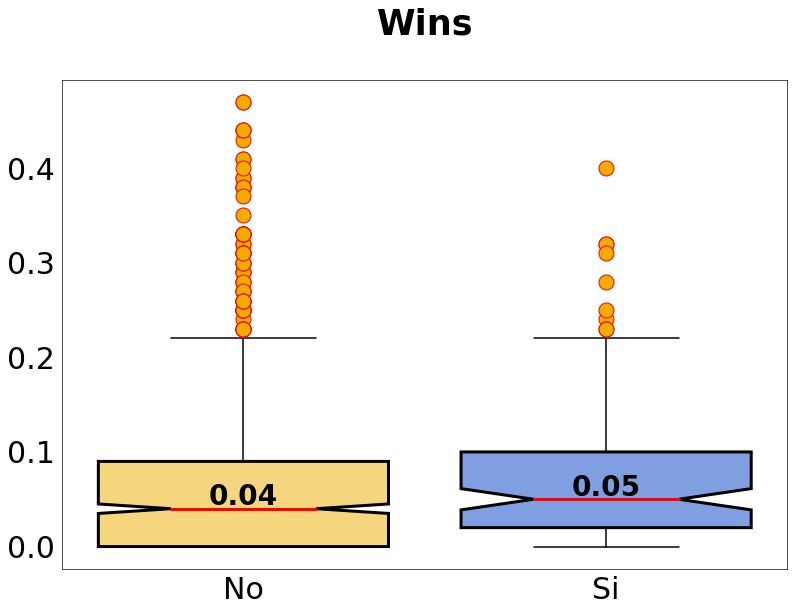

In [110]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_1 = sns.boxplot(x = 'agente_libre',
                      y = pitcher_statistics[i],
                      data = df_panel_pitcher, 
                      notch = True, 
                      **kws_1)
    g_1.set_title(pitcher_labels[i] + '\n',
                  fontsize = 35,
                  fontweight = 'bold',
                  color = 'black')
    g_1.set_ylabel(pitcher_labels[i],
                   fontsize = 26,
                   fontweight = 'bold',
                   color = 'black')
    g_1.set_xlabel('Agentes libres',
                   fontsize = 19,
                   fontweight = 'bold',
                   color = 'black')  
    g_1.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_1.set(xlabel = None)
    g_1.set(ylabel = None)
    """g_1.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.8)"""

    mybox = g_1.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_pitcher.groupby(['agente_libre'])[pitcher_statistics[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_pitcher[pitcher_statistics[i]].median()

    for xtick in g_1.get_xticks():
        g_1.text(xtick,
                 medians[xtick] + vertical_offset*pitcher_positions[i] + pitcher_positions_adjustment[i],
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Boxplot/Per_Game/boxplot_pitcher_" + str(pitcher_labels_save[i]).lower() + ".pdf",
                format = "pdf")

## Series de tiempo

Grafiquemos los promedios a lo largo de las temporadas

In [20]:
temporadas = [str(year) for year in range(2012,2023)]

In [21]:
mean_panel_hitter = df_panel_hitter.groupby(['agente_libre','anio']).mean()
mean_panel_hitter.reset_index(inplace = True)
mean_panel_pitcher = df_panel_pitcher.groupby(['agente_libre','anio']).mean()
mean_panel_pitcher.reset_index(inplace = True)

In [22]:
mean_panel_hitter[mean_panel_hitter['anio'] >= 2018].head()

agente_libre  anio    altura  anio_de_agente_libre  anios_de_contrato  \
7            No  2018  6.241719            430.064356           1.386139   
8            No  2019  6.257361            938.846847           1.234234   
9            No  2020  6.166468           1251.212121           1.624242   
10           No  2021  6.236311            945.731988           1.383285   
11           No  2022  5.908955            375.037037           1.000000   

    antiguedad   at-bats  at-bats_2    bateos  bateos_2  ...  sueldo_regular  \
7     0.772277  0.461337   0.548485  0.040050  0.007826  ...    2.283068e+06   
8     0.630631  0.462883   0.606681  0.047207  0.010027  ...    2.020785e+06   
9     0.800000  2.705636   7.995468  0.605515  0.429005  ...    2.952272e+06   
10    0.685879  1.396744   3.575126  0.275303  0.191944  ...    2.582188e+06   
11    0.481481  2.104074   5.639737  0.490000  0.554248  ...    8.302704e+05   

    triples  triples_2       tvs     tvs_2  valor_contrato_promedio  \
7       0.0        0.0  0.621733  1.226706             2.160763e+06   
8       0.0        0.0  0.614955  1.214520             1.961930e+06   
9       0.0        0.0  0.410667  0.661850             2.993775e+06   
10      0.0        0.0  0.545216  1.146135             2.643318e+06   
11      0.0        0.0  0.032222  0.028033             8.302704e+05   

    valor_contrato_total  valor_del_contrato  victorias  ws ganadas  
7           5.171700e+07        7.794604e+06  82.039604    3.940594  
8           6.516268e+07        5.077277e+06  79.797297    4.004505  
9           7.374556e+07        1.250034e+07  29.224242    4.466667  
10          4.462737e+07        9.089036e+06  79.178674    3.994236  
11          7.862044e+07        8.302704e+05  76.185185    3.222222  

[5 rows x 59 columns]

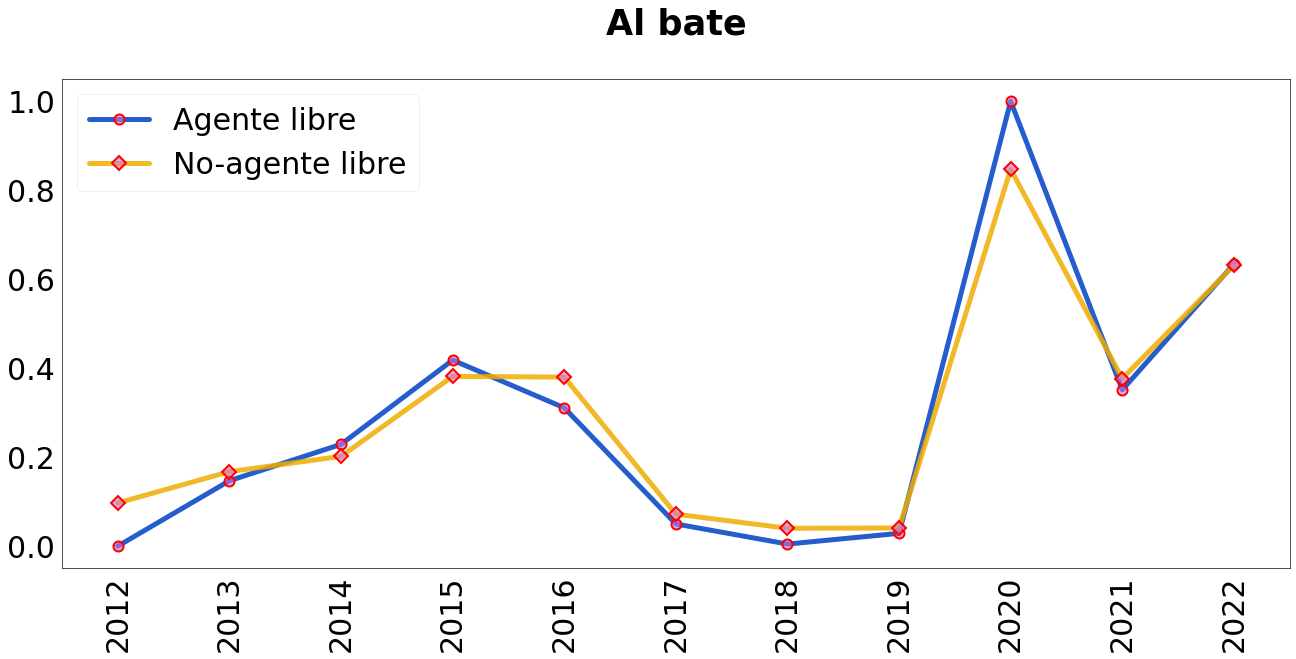

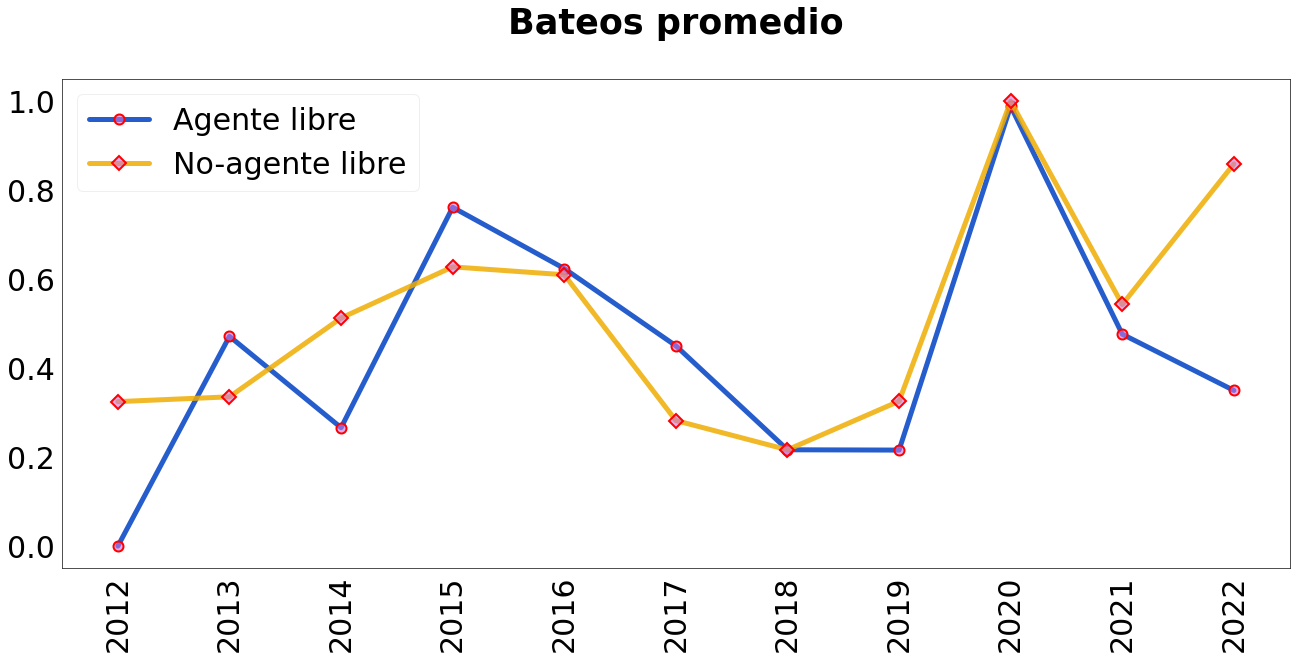

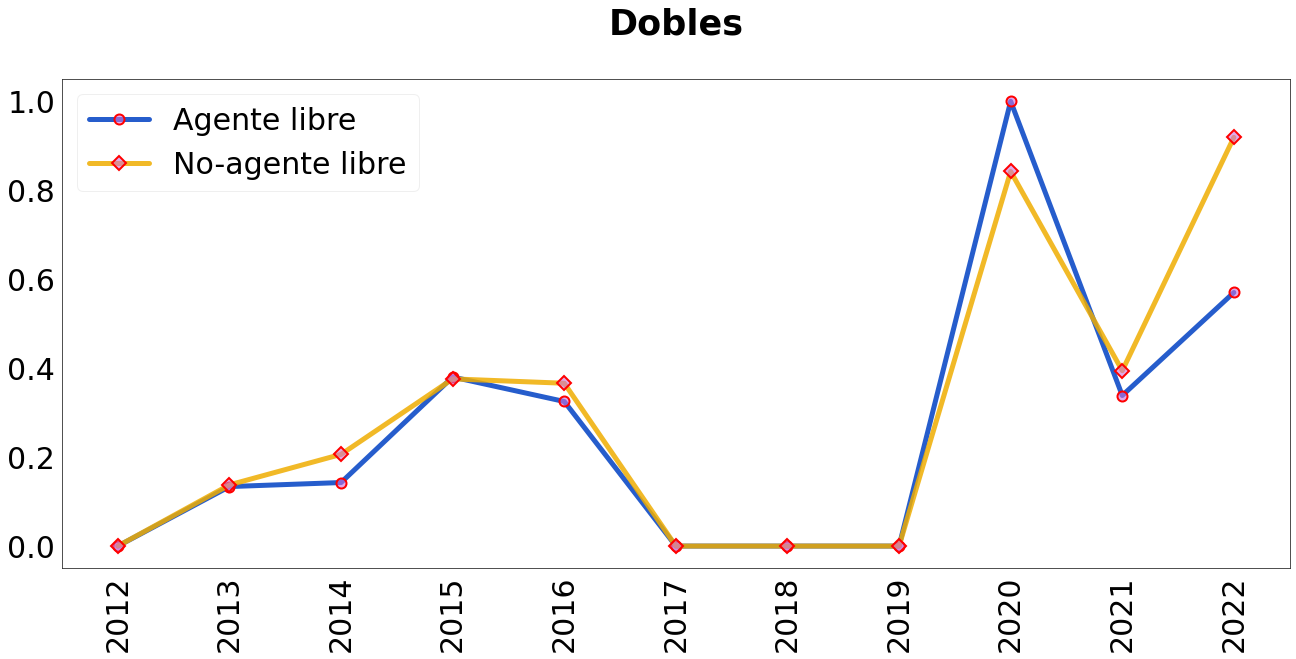

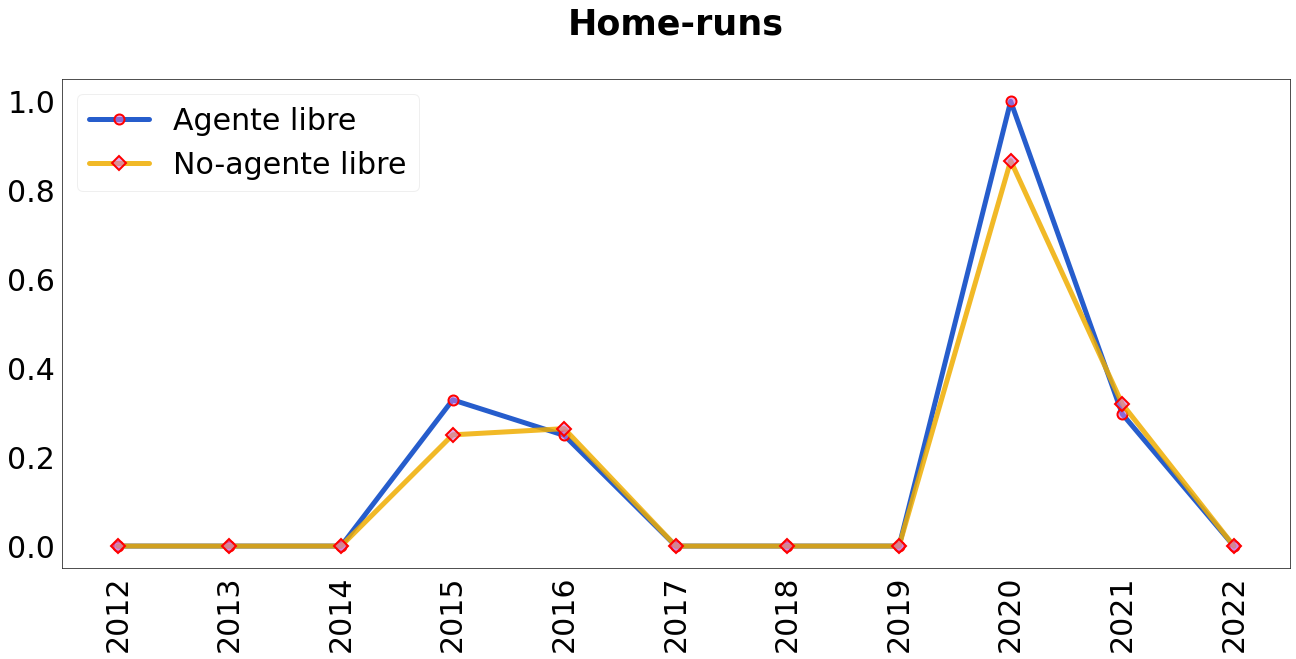

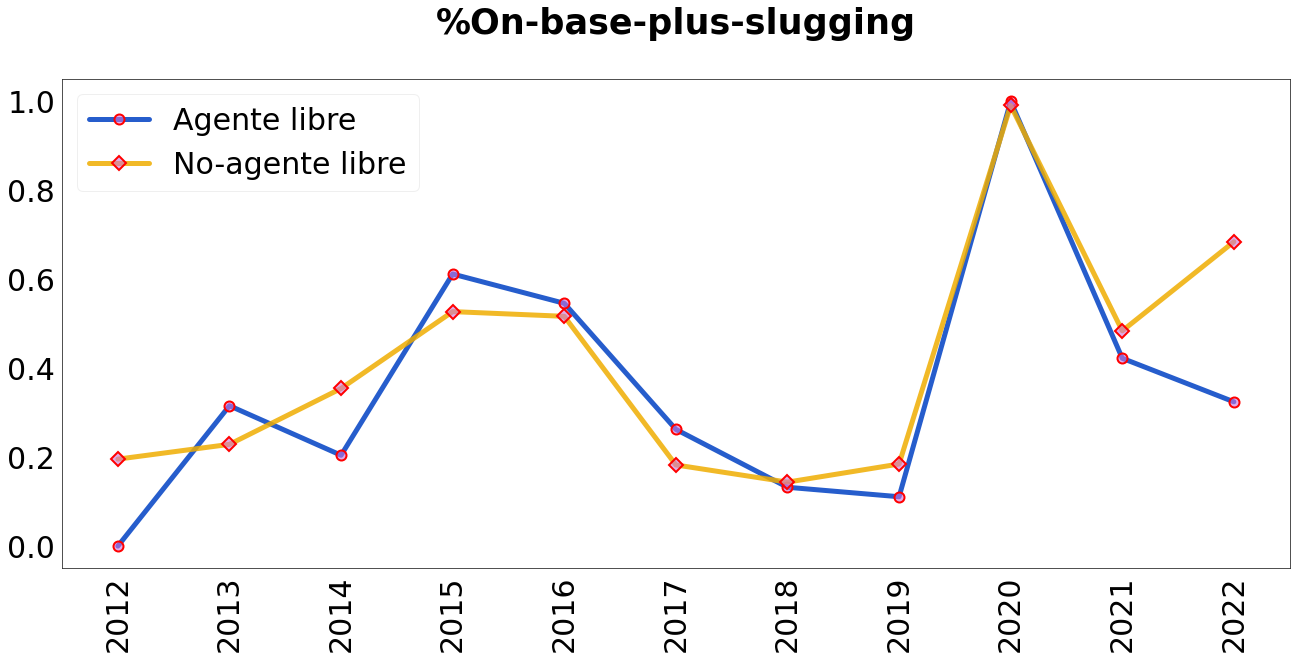

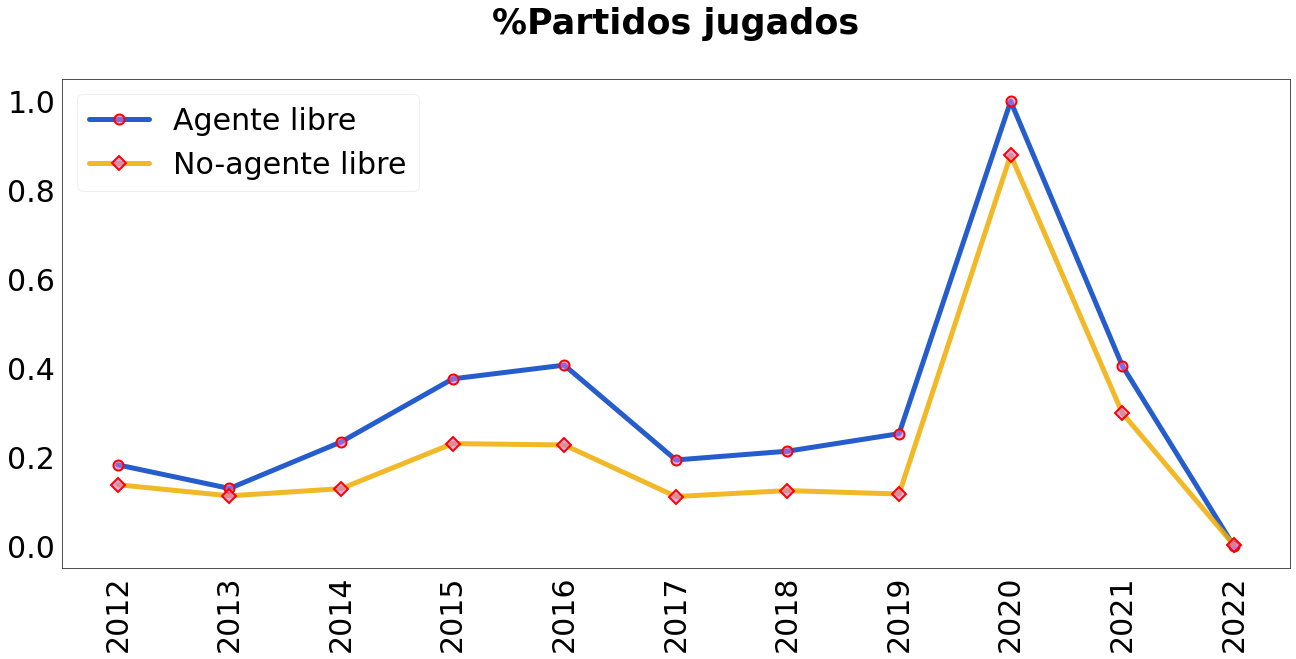

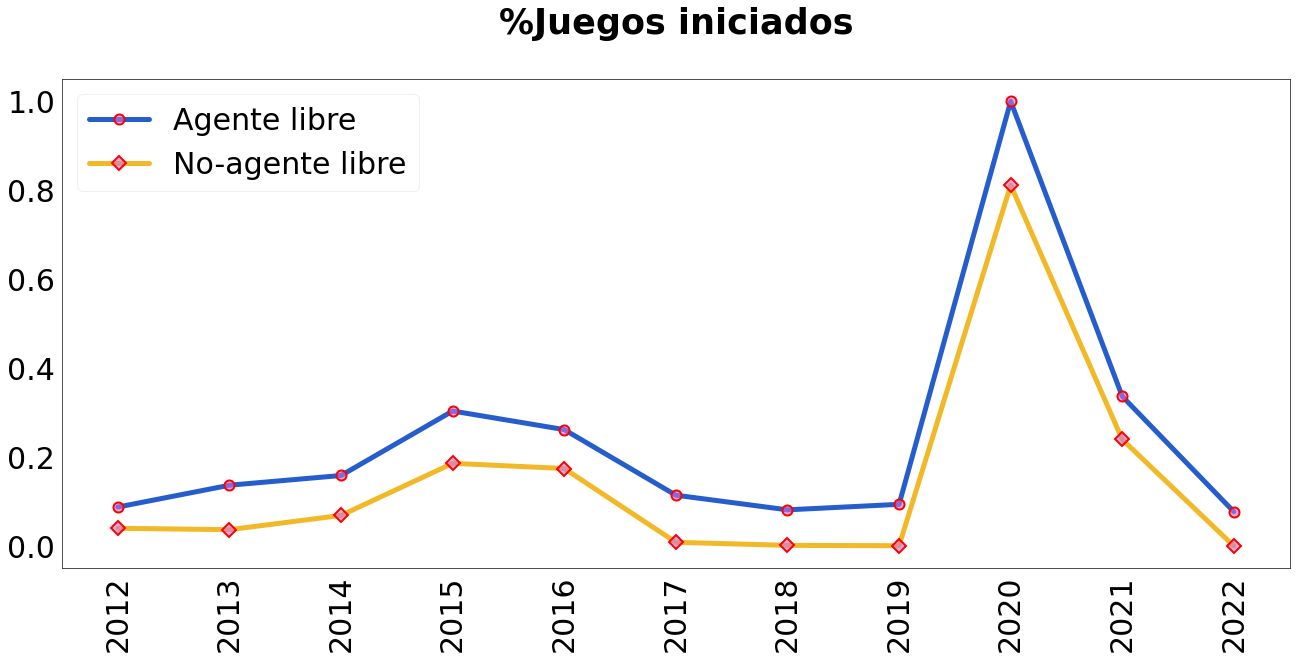

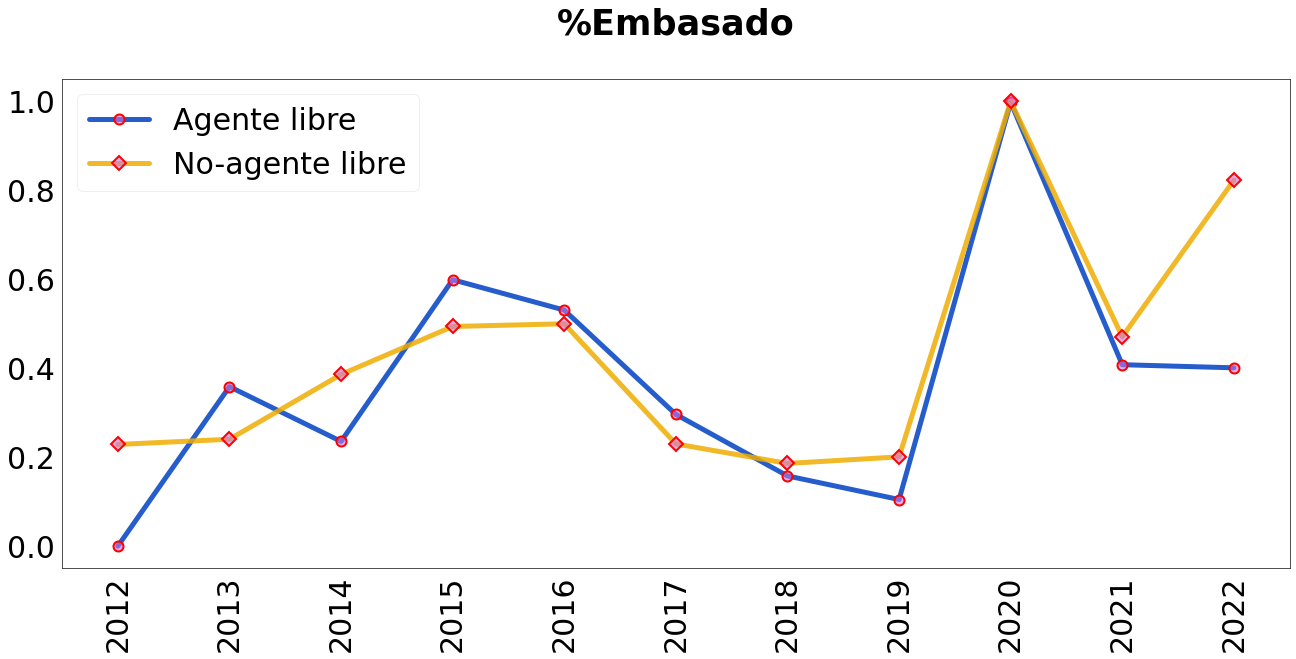

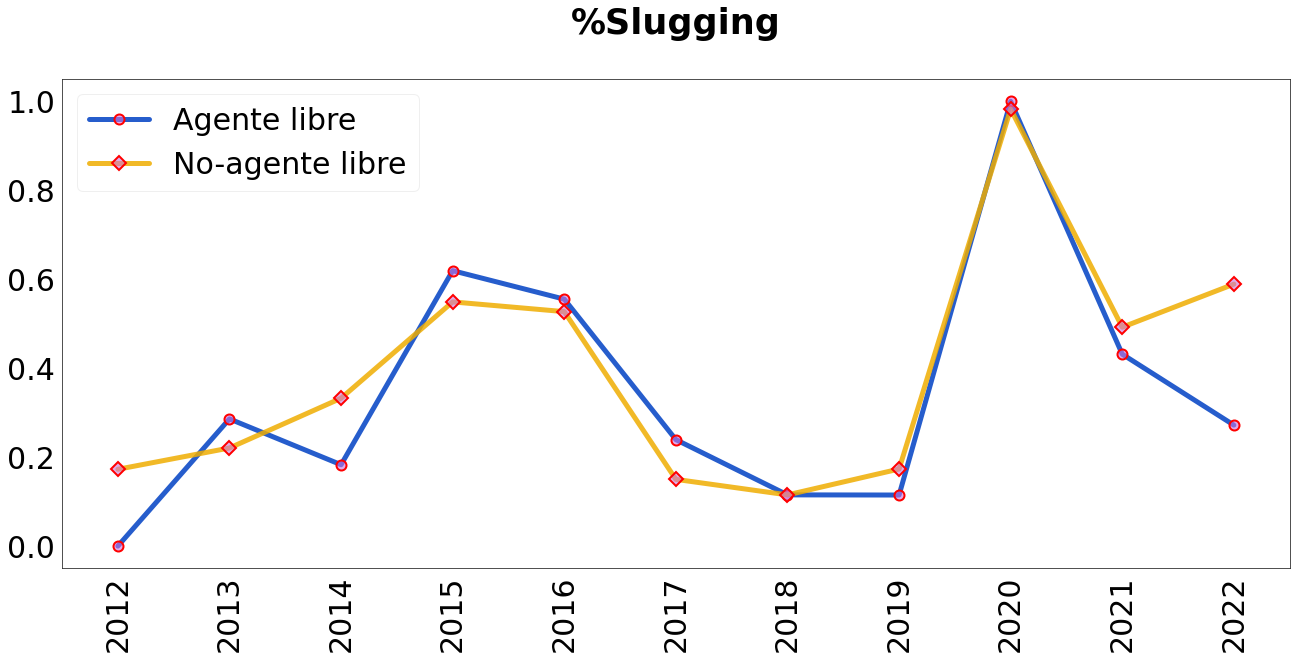

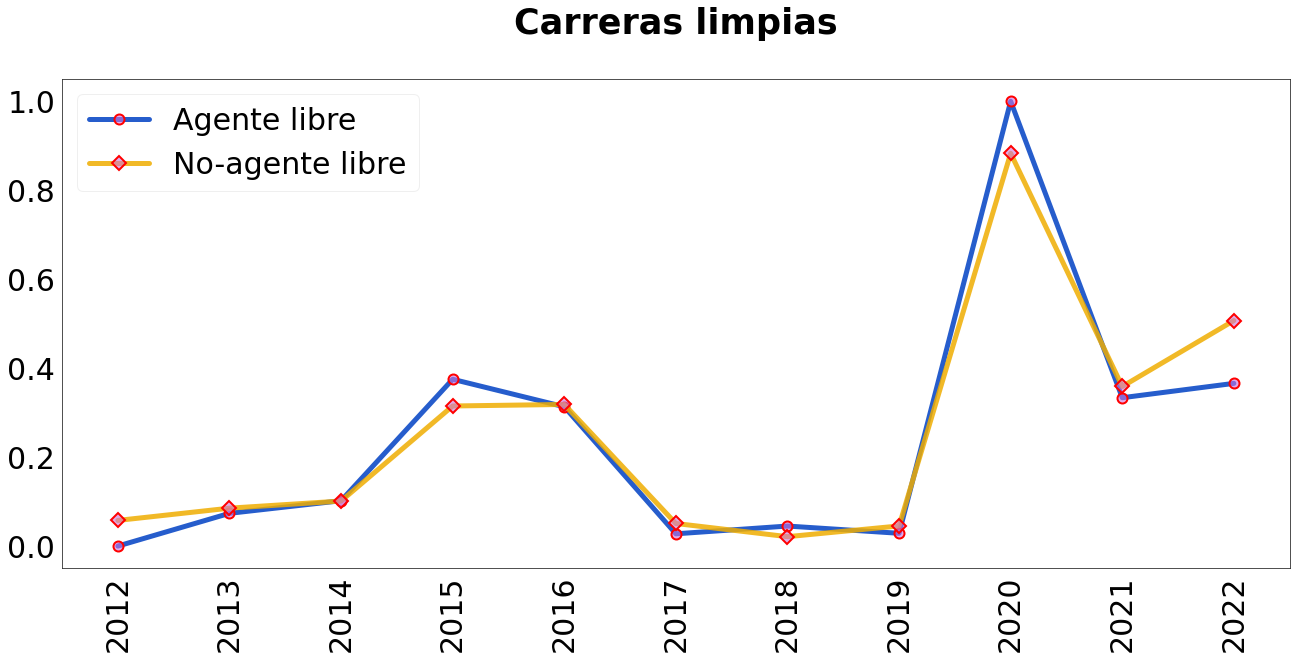

In [23]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    # Bases de datos
    mean_hitter_fa = mean_panel_hitter[(mean_panel_hitter['agente_libre'] == 'Si') & (mean_panel_hitter['anio'] > 2011)][hitter_statistics[i]]
    mean_hitter_no = mean_panel_hitter[(mean_panel_hitter['agente_libre'] == 'No') & (mean_panel_hitter['anio'] > 2011)][hitter_statistics[i]]
    # Máximos
    max_hitter = mean_panel_hitter[hitter_statistics[i]].max()
    # Mínimos
    min_hitter = mean_panel_hitter[hitter_statistics[i]].min()
    # Bases normalizadas
    normalized_fa = (mean_hitter_fa - min_hitter)/(max_hitter - min_hitter)
    normalized_no = (mean_hitter_no - min_hitter)/(max_hitter - min_hitter)
    
    axes.plot(temporadas,
              normalized_fa,
              color = (0/255,64/255,196/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'o',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'Agente libre')
    axes.plot(temporadas,
              normalized_no,
              color = (239/255,173/255,1/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'D',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'No-agente libre')
    axes.set_title(hitter_labels[i] + '\n',
                   fontsize = 35,
                   fontweight = 'bold',
                   color = 'black')
    axes.set_xlabel('Temporadas',
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.set_ylabel(hitter_labels[i], 
                    fontsize = 26,
                    color = 'black',
                    fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    axes.tick_params(axis = 'x',
                     labelrotation = 90)
    legend = plt.legend(loc = 'best', 
                    labelcolor = 'black', 
                    fontsize = 30,
                    facecolor = 'white',
                    framealpha = 0.3,
                    fancybox = True,
                    frameon = True)
    axes.set(xlabel = None)
    axes.set(ylabel = None)
    axes.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Line_plot/Per_Game/plot_hitter_" + str(hitter_labels_save[i]).lower() + ".pdf",
                format = "pdf")

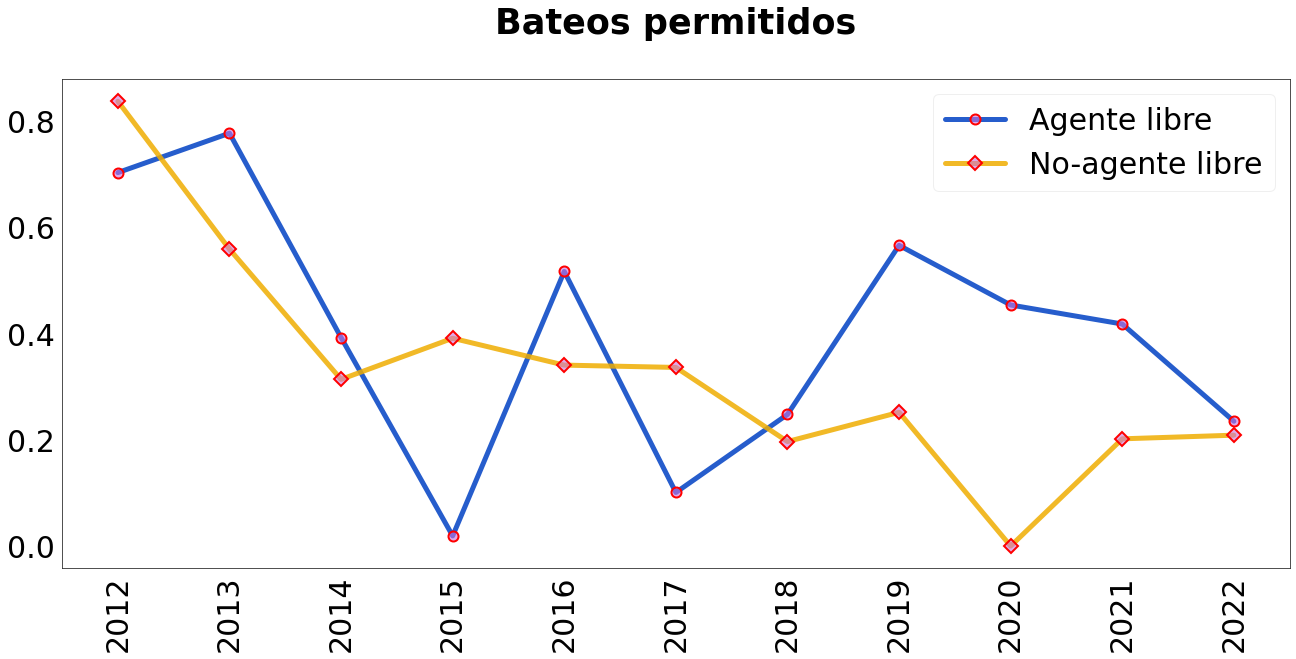

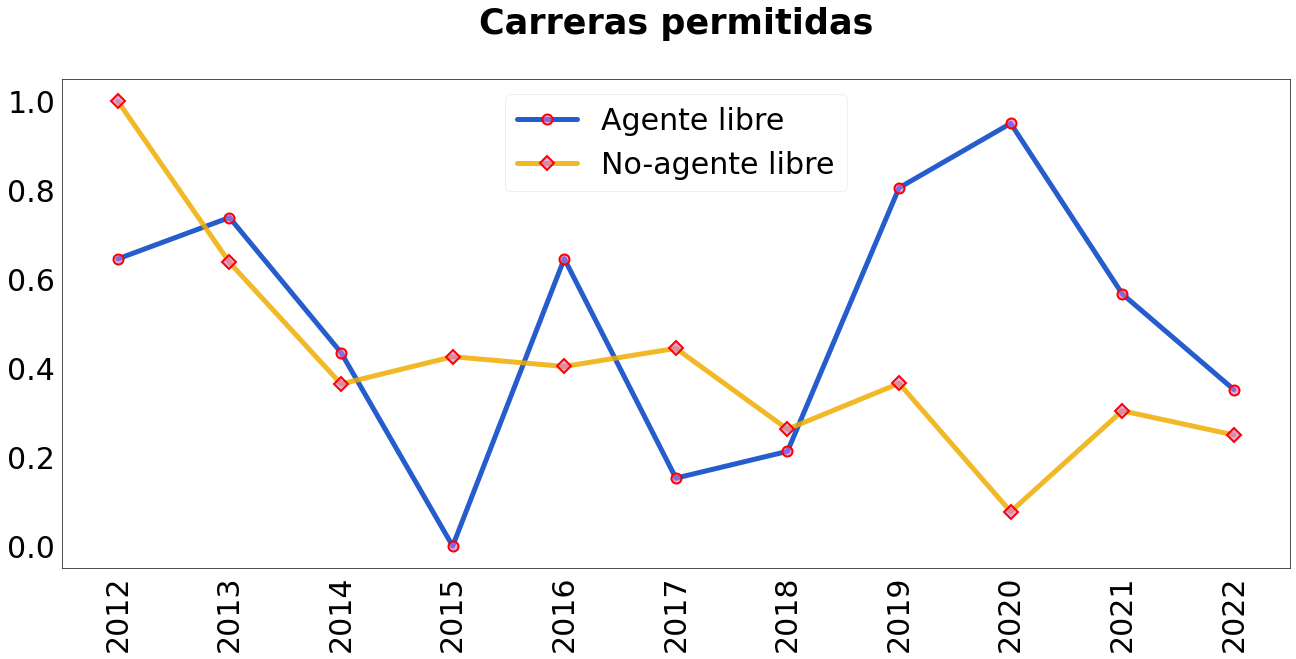

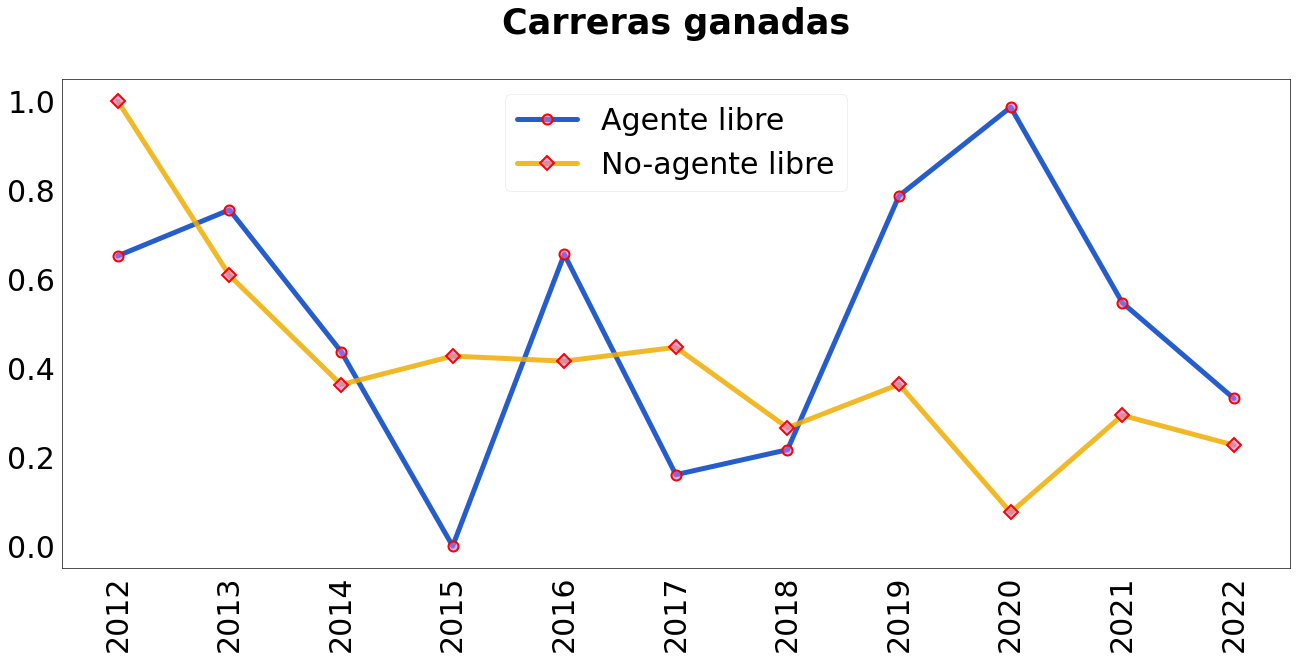

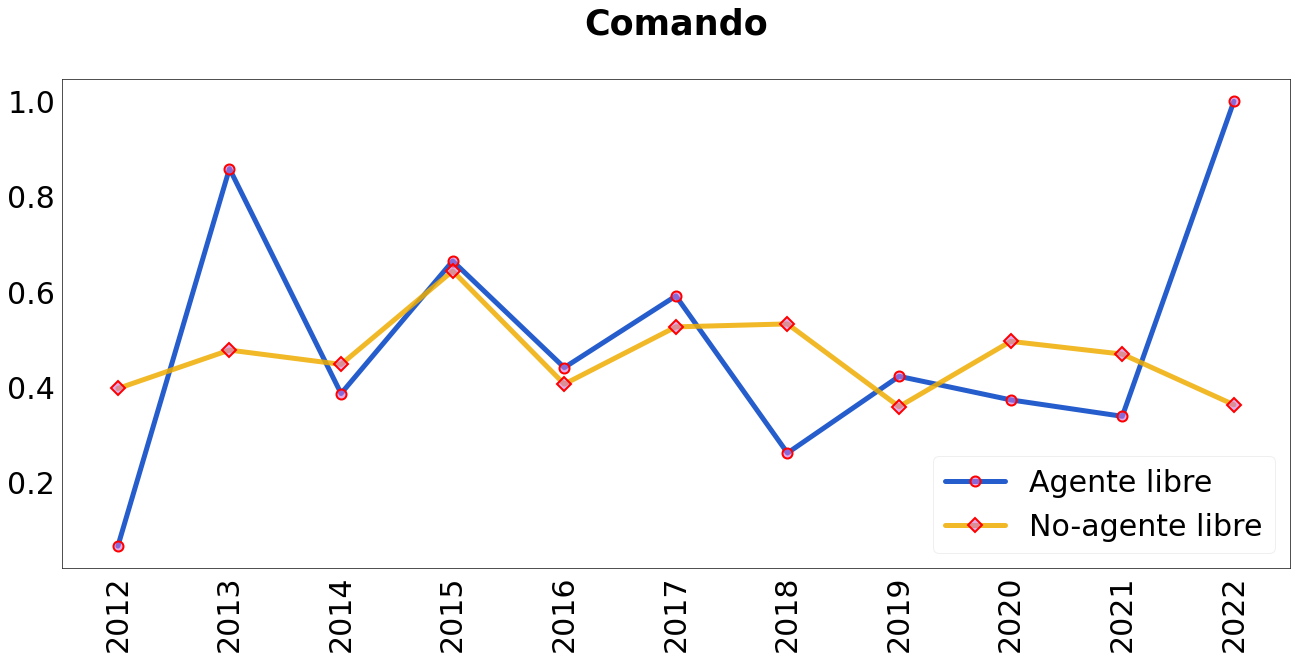

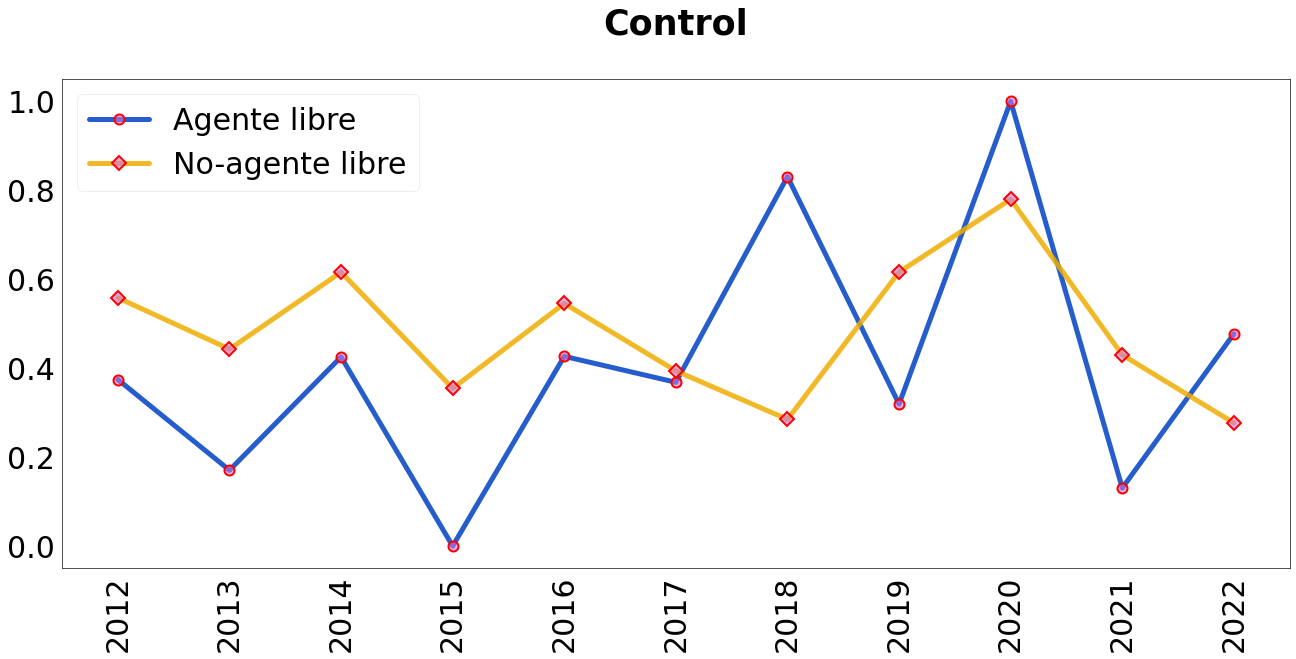

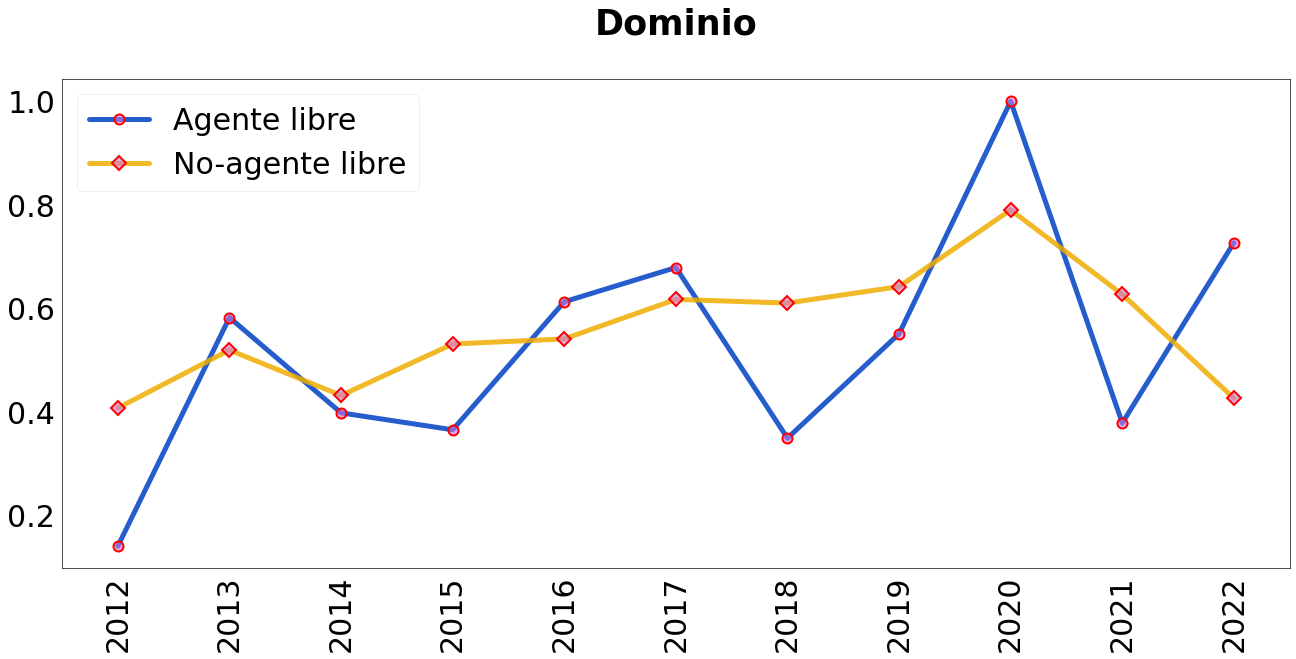

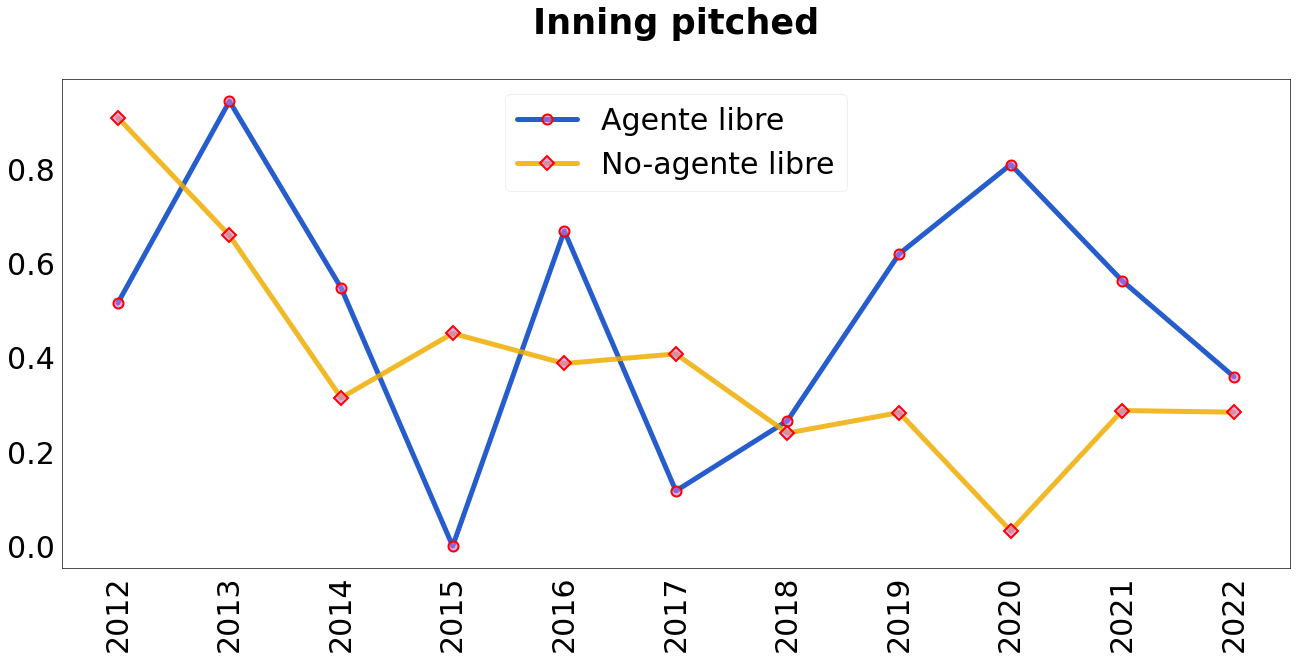

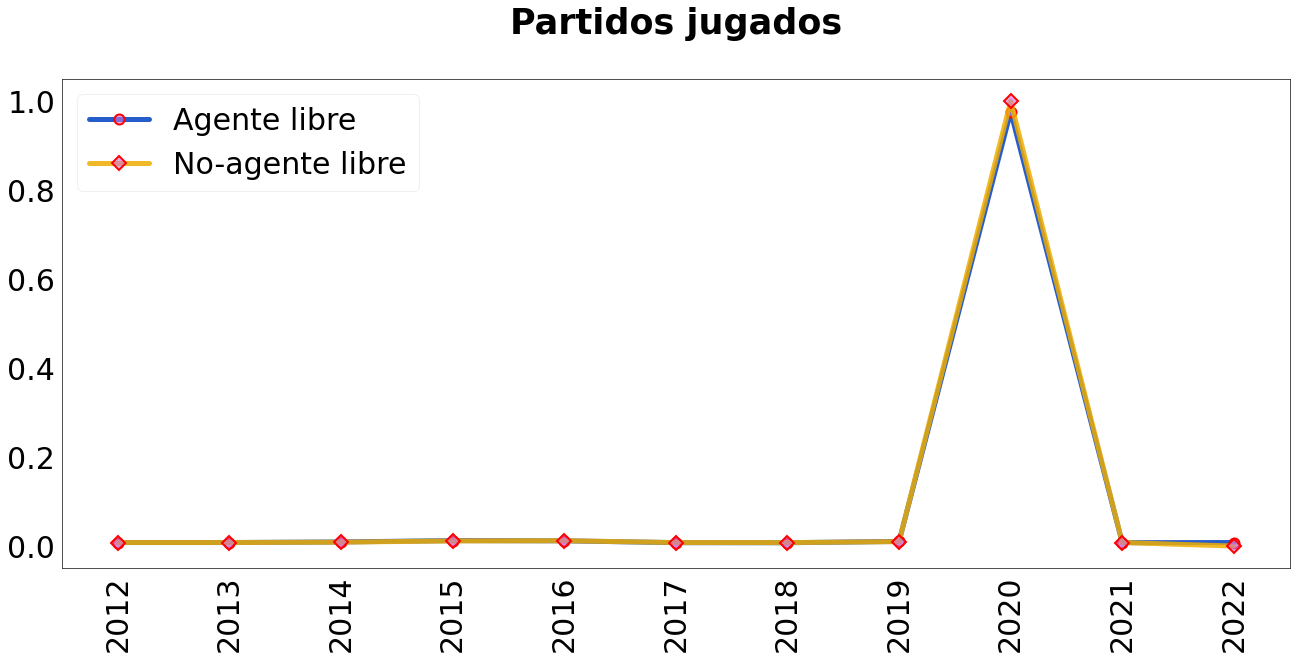

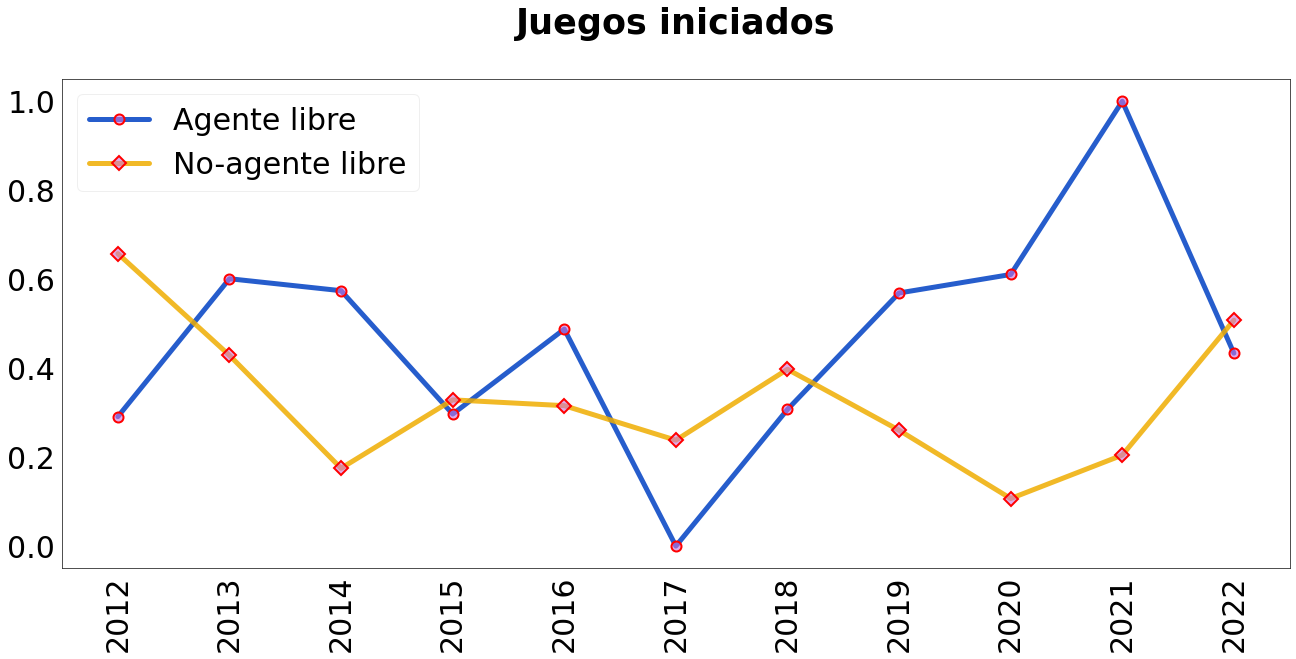

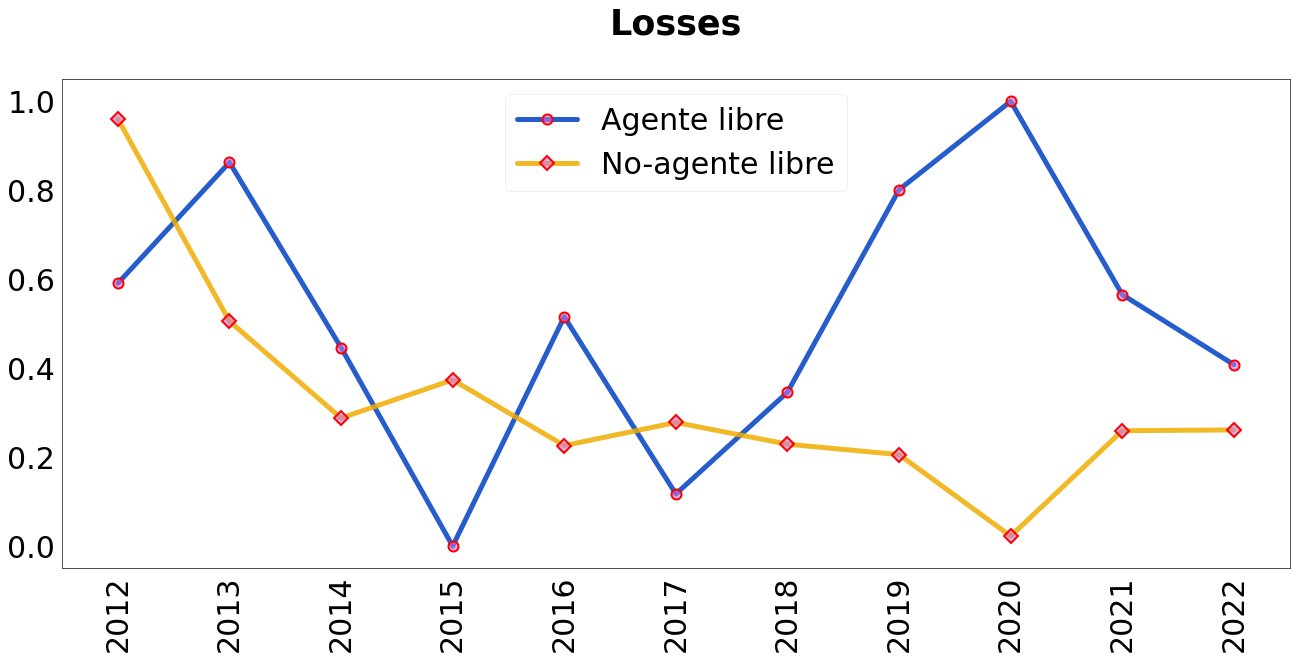

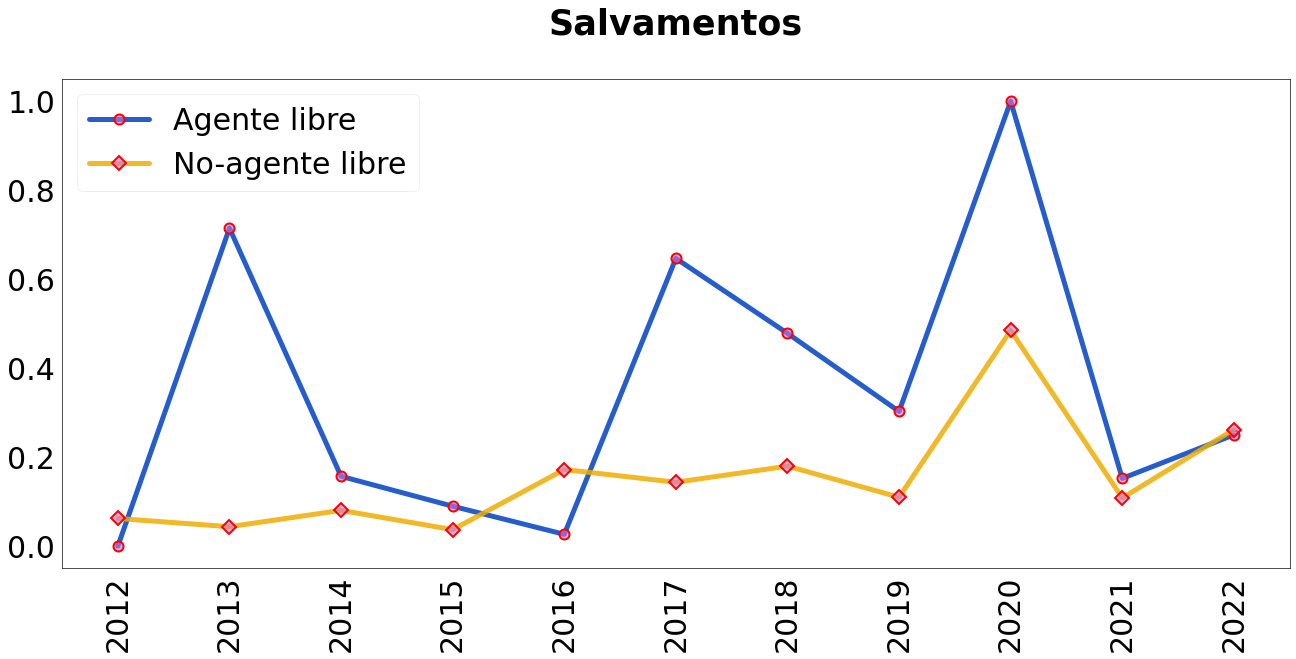

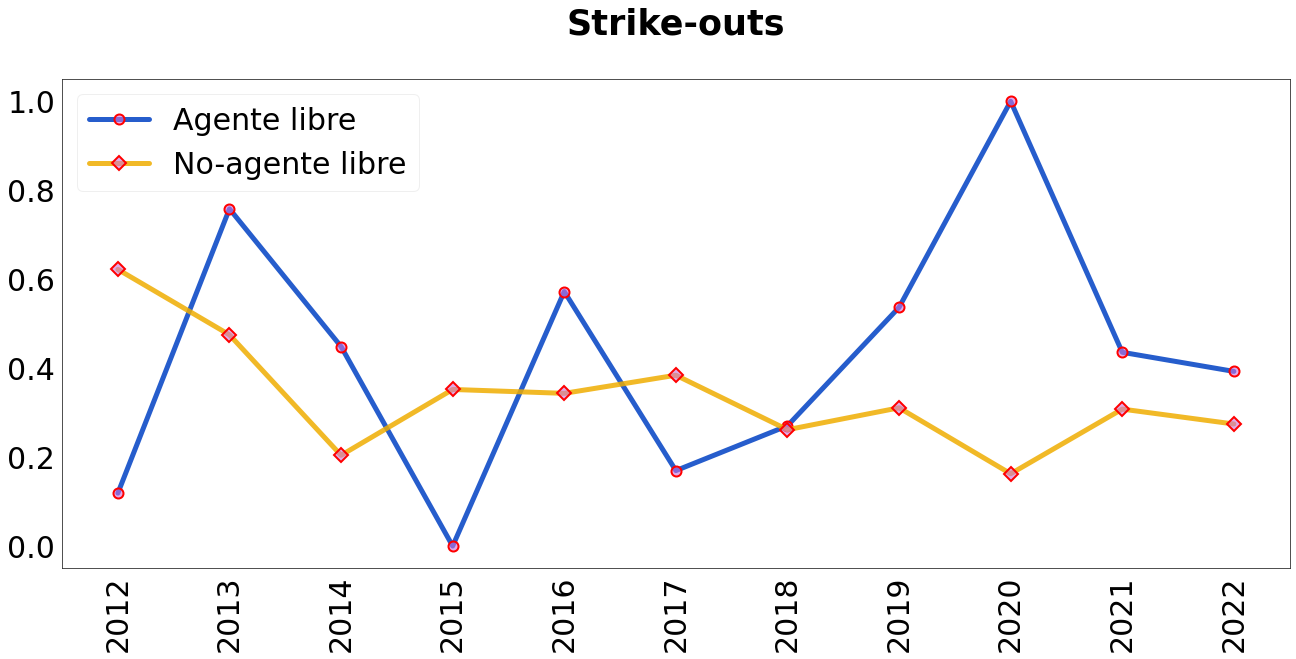

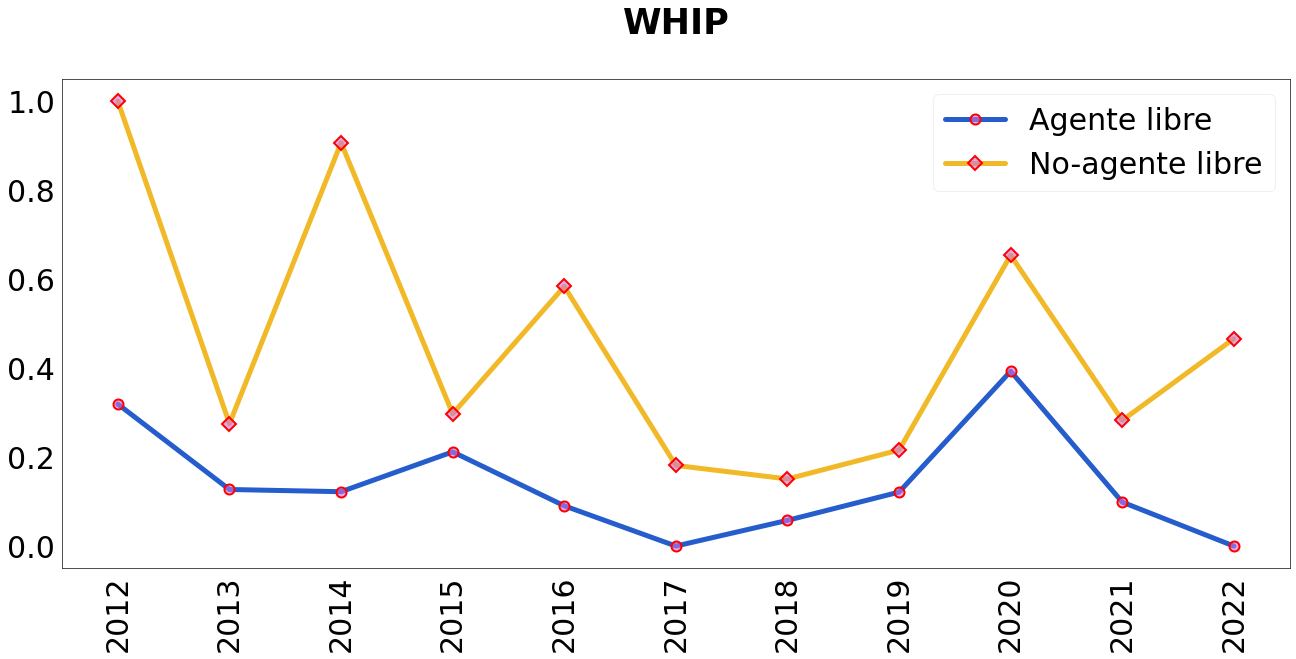

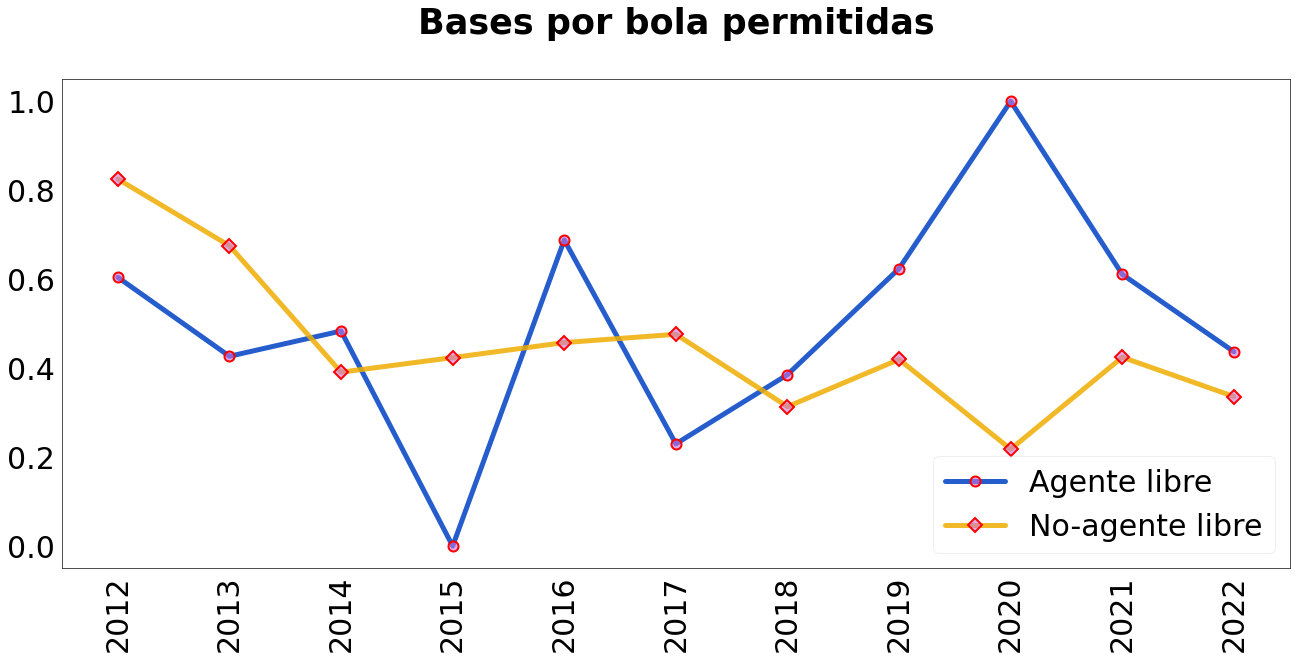

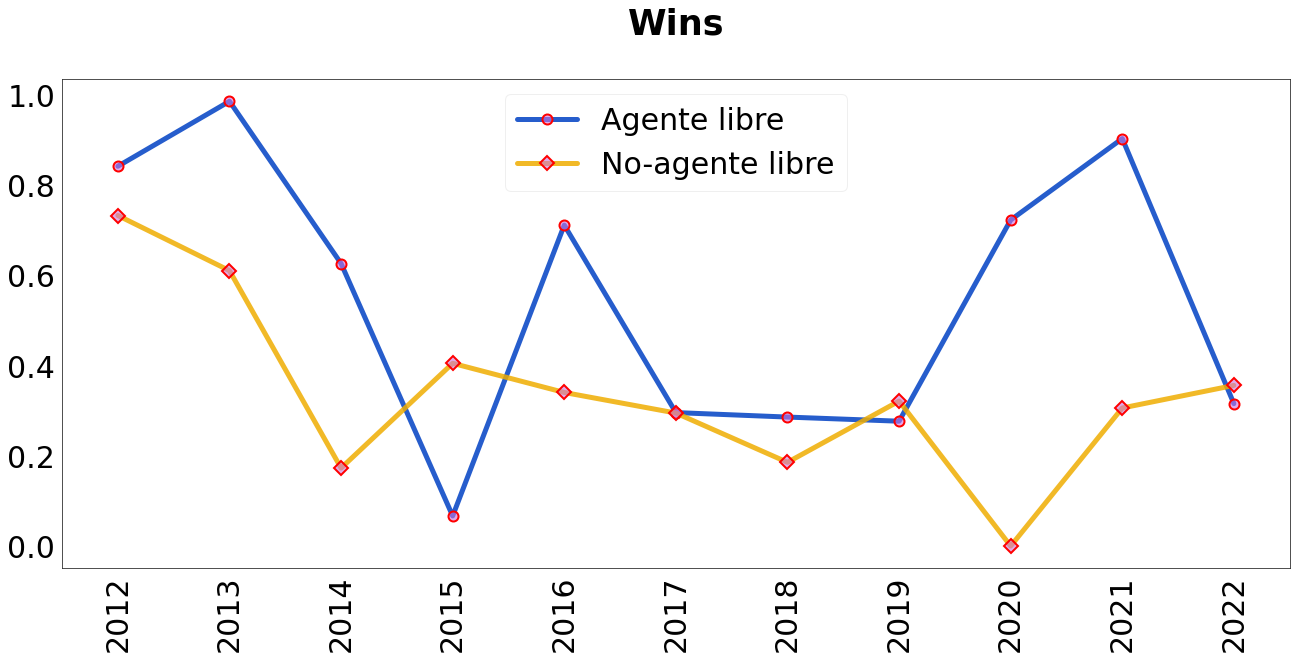

In [24]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    # Bases de datos
    mean_pitcher_fa = mean_panel_pitcher[(mean_panel_pitcher['agente_libre'] == 'Si') & (mean_panel_pitcher['anio'] > 2011)][pitcher_statistics[i]]
    mean_pitcher_no = mean_panel_pitcher[(mean_panel_pitcher['agente_libre'] == 'No') & (mean_panel_pitcher['anio'] > 2011)][pitcher_statistics[i]]
    # Máximos
    max_pitcher = mean_panel_pitcher[pitcher_statistics[i]].max()
    # Mínimos
    min_pitcher = mean_panel_pitcher[pitcher_statistics[i]].min()
    # Bases normalizadas
    normalized_fa = (mean_pitcher_fa - min_pitcher)/(max_pitcher - min_pitcher)
    normalized_no = (mean_pitcher_no - min_pitcher)/(max_pitcher - min_pitcher)
    
    axes.plot(temporadas,
              normalized_fa,
              color = (0/255,64/255,196/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'o',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'Agente libre')
    axes.plot(temporadas,
              normalized_no,
              color = (239/255,173/255,1/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'D',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'No-agente libre')
    axes.set_title(pitcher_labels[i] + '\n',
                   fontsize = 35,
                   fontweight = 'bold',
                   color = 'black')
    axes.set_xlabel('Temporadas',
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.set_ylabel(pitcher_labels[i], 
                    fontsize = 26,
                    color = 'black',
                    fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    axes.tick_params(axis = 'x',
                     labelrotation = 90)
    legend = plt.legend(loc = 'best', 
                    labelcolor = 'black',
                    fontsize = 30,
                    facecolor = 'white',
                    framealpha = 0.3,
                    fancybox = True,
                    frameon = True)
    axes.set(xlabel = None)
    axes.set(ylabel = None)
    axes.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Line_plot/Per_Game/plot_pitcher_" + str(pitcher_labels_save[i]).lower() + ".pdf",
                format = "pdf")

## Diagramas de densidad

Primero, calcularemos los ancho de ventana óptimas

In [25]:
# Agentes libres
fa_pitcher_binwidth = [0]*len(pitcher_statistics)
fa_hitter_binwidth = [0]*len(hitter_statistics)
# Mo agentes libres
no_pitcher_binwidth = [0]*len(pitcher_statistics)
no_hitter_binwidth = [0]*len(hitter_statistics)

# Pitchers dataframes
fa_pitcher = mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'Si']
no_pitcher = mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'No']
# Filtered dataframes
fa_hitter = mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'Si']
no_hitter = mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'No']

# Pitchers:
for i in range(0,len(pitcher_statistics)):    
    # Agentes libres pitchers:
    # Obteniendo percentiles
    fa_pitcher_aux = fa_pitcher[pitcher_statistics[i]]
    P = np.percentile(fa_pitcher_aux, [10, 90])
    fa_pitcher_filtered = fa_pitcher[(fa_pitcher_aux > P[0]) & (fa_pitcher_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = fa_pitcher_filtered[pitcher_statistics[i]].std()
    q1, q3 = np.percentile(fa_pitcher_filtered[pitcher_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = fa_pitcher_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    fa_pitcher_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda
    
    # No-agentes libres pitchers:
    # Obteniendo percentiles
    no_pitcher_aux = no_pitcher[pitcher_statistics[i]]
    P = np.percentile(no_pitcher_aux, [5, 95])
    no_pitcher_filtered = no_pitcher[(no_pitcher_aux > P[0]) & (no_pitcher_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = no_pitcher_filtered[pitcher_statistics[i]].std()
    q1, q3 = np.percentile(no_pitcher_filtered[pitcher_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = no_pitcher_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    no_pitcher_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda

# Hitters:
for i in range(0,len(hitter_statistics)): 
    # Agentes libres pitchers:
    # Obteniendo percentiles
    fa_hitter_aux = fa_hitter[hitter_statistics[i]]
    P = np.percentile(fa_hitter_aux, [10, 90])
    fa_hitter_filtered = fa_hitter[(fa_hitter_aux > P[0]) & (fa_hitter_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = fa_hitter_filtered[hitter_statistics[i]].std()
    q1, q3 = np.percentile(fa_hitter_filtered[hitter_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = fa_hitter_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    fa_hitter_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda
    
    # No-agentes libres:
    # Obteniendo percentiles
    no_hitter_aux = no_hitter[hitter_statistics[i]]
    P = np.percentile(no_hitter_aux, [10, 90])
    no_hitter_filtered = no_hitter[(no_hitter_aux > P[0]) & (no_hitter_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = no_hitter_filtered[hitter_statistics[i]].std()
    q1, q3 = np.percentile(no_hitter_filtered[hitter_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = no_hitter_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    no_hitter_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda

In [26]:
hitter_positions = [0.1, -0.3, 0.2, 0.4, -0.4,
                    0.05, 0.08, -0.25, -0.5, 0.2,
                    1, -0.4]
hitter_positions_adjustment = [0, 0, 0, 0, 0,
                               0, 0, 0, 0, 0,
                               0.2, 0]
pitcher_positions = [0.1, 0.1, 0.1, 0.5, -3,
                    0.23, 0.1, 0.1, 2,
                    0.05, 0.08, 0.1, -0.48, -1.73,
                    0.1, 0.2]
pitcher_positions_adjustment = [0, 0, 0, 50, 2,
                                0.01, 0, 0, 0,
                                0, -1, 0, 0, 0,
                                0, 0]

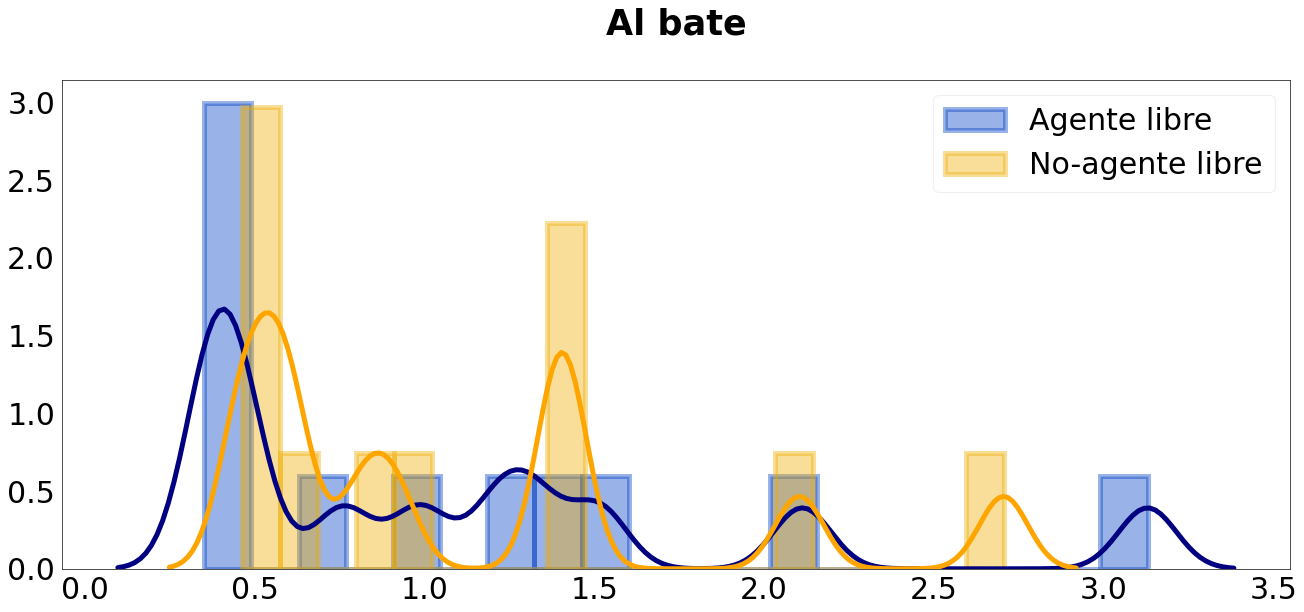

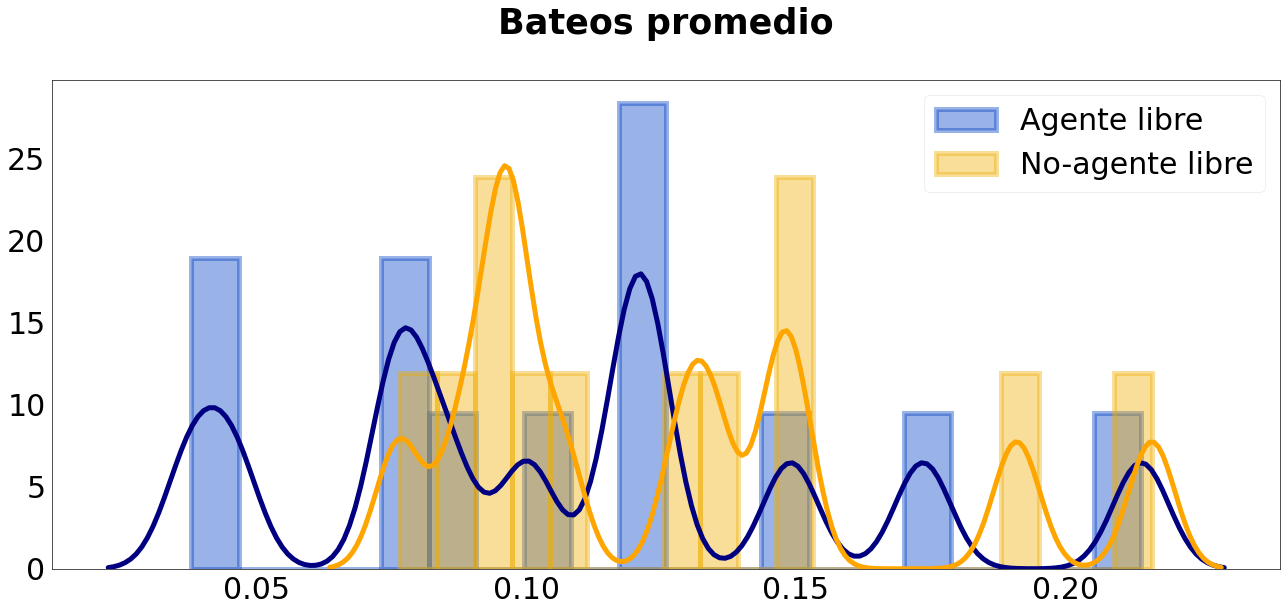

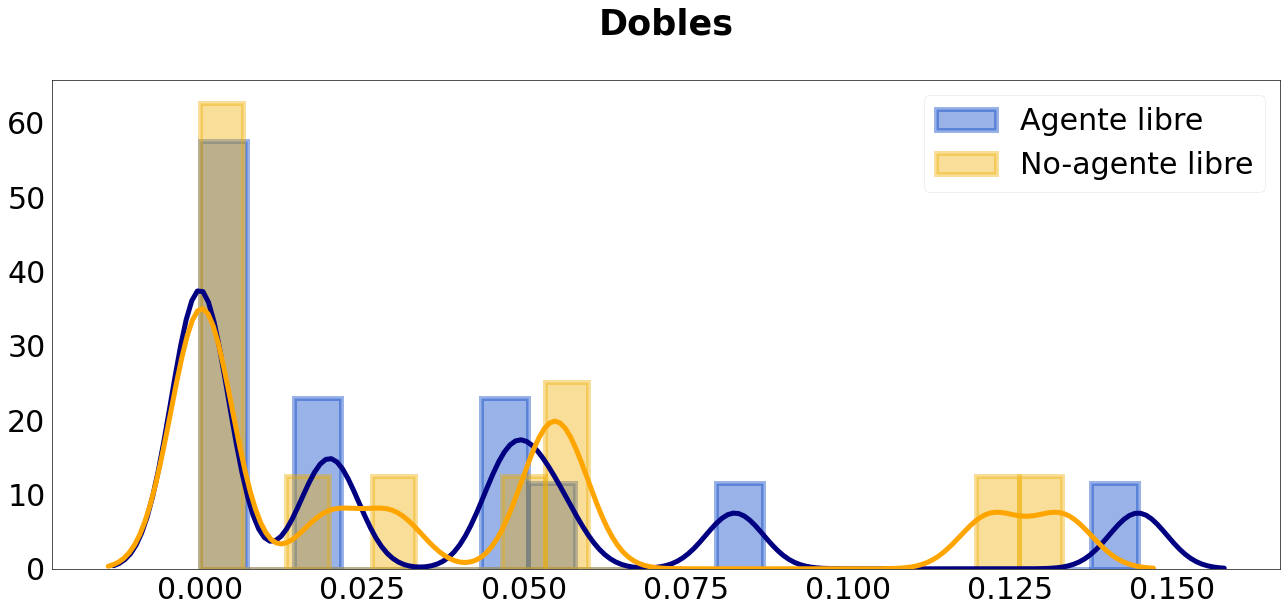

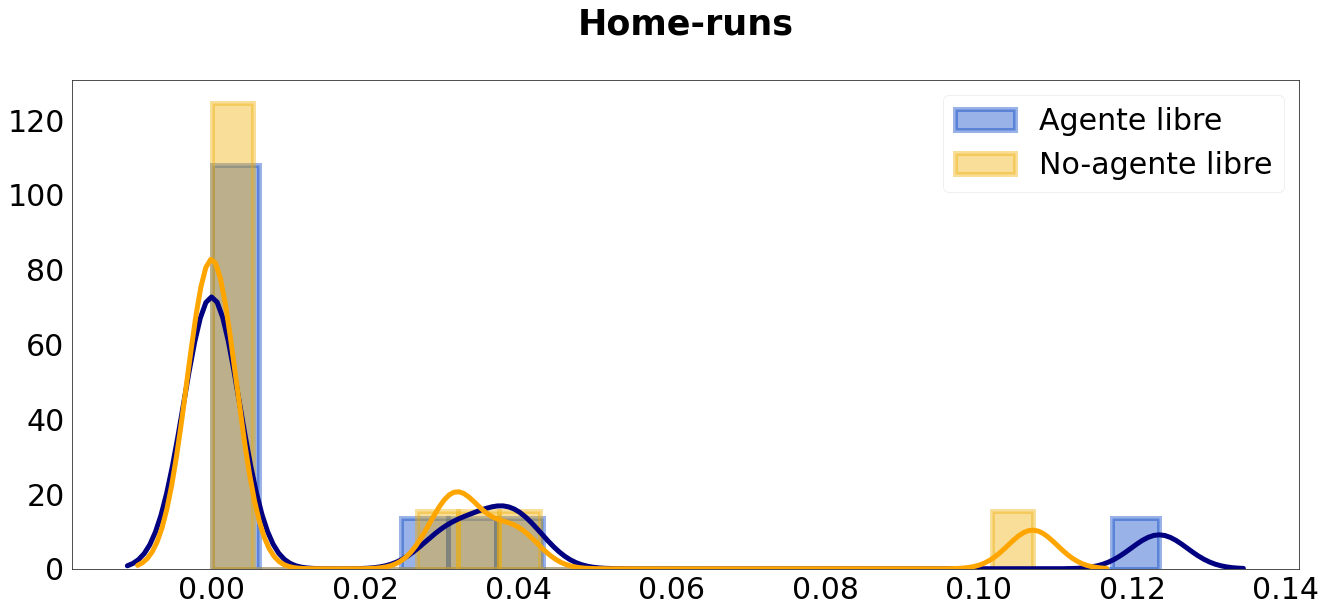

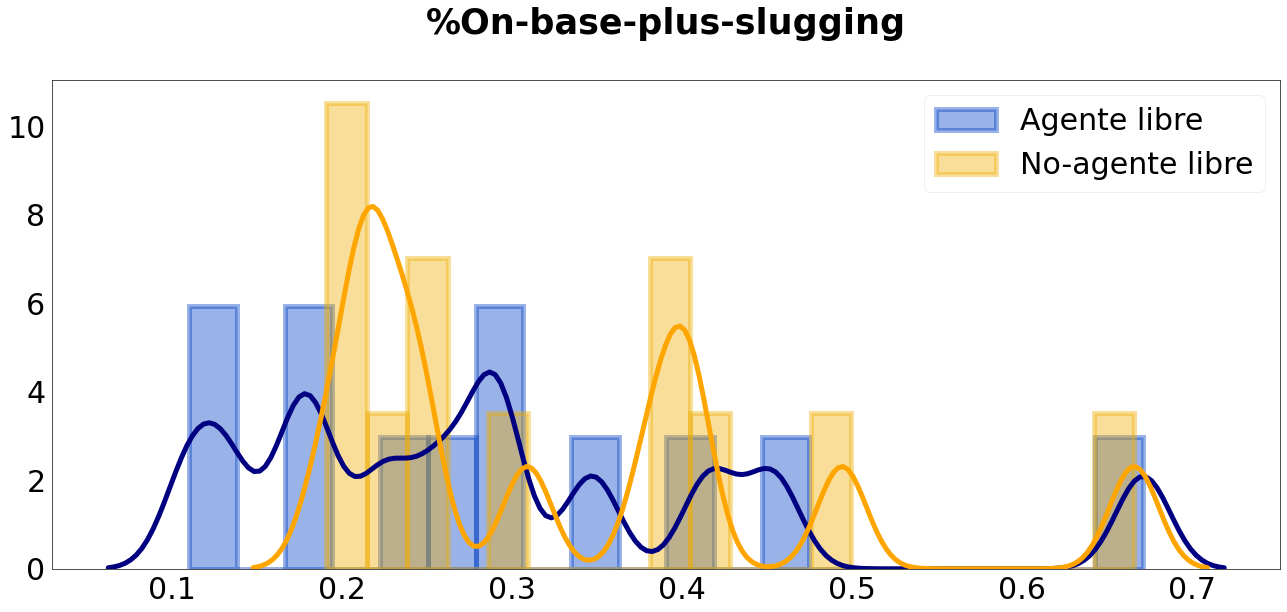

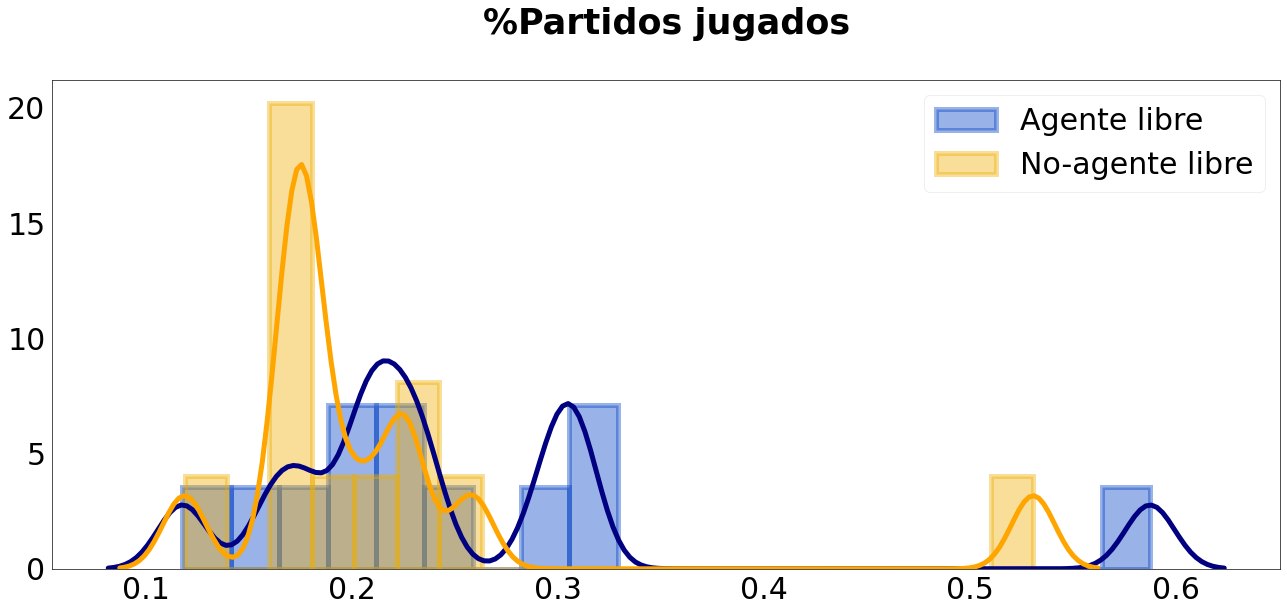

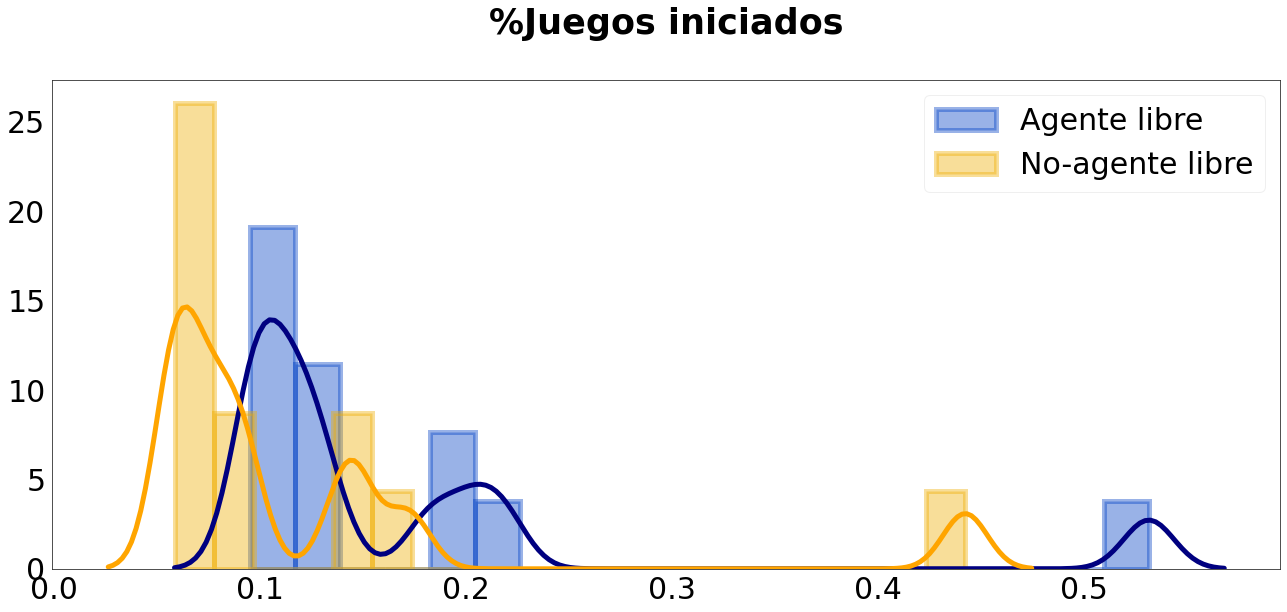

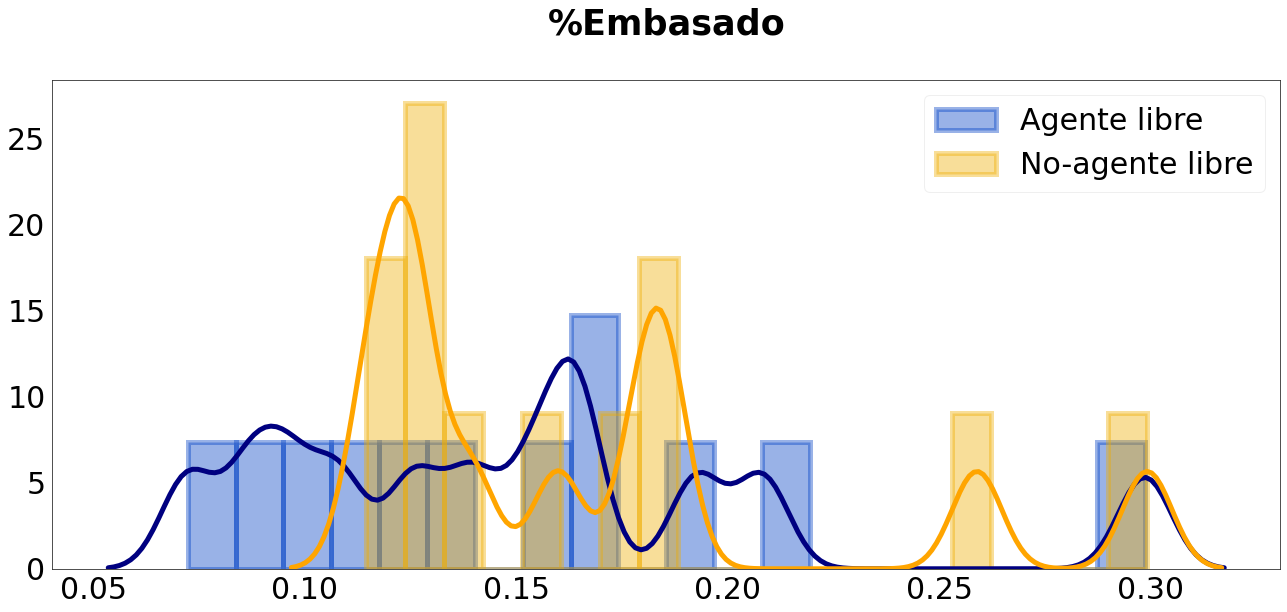

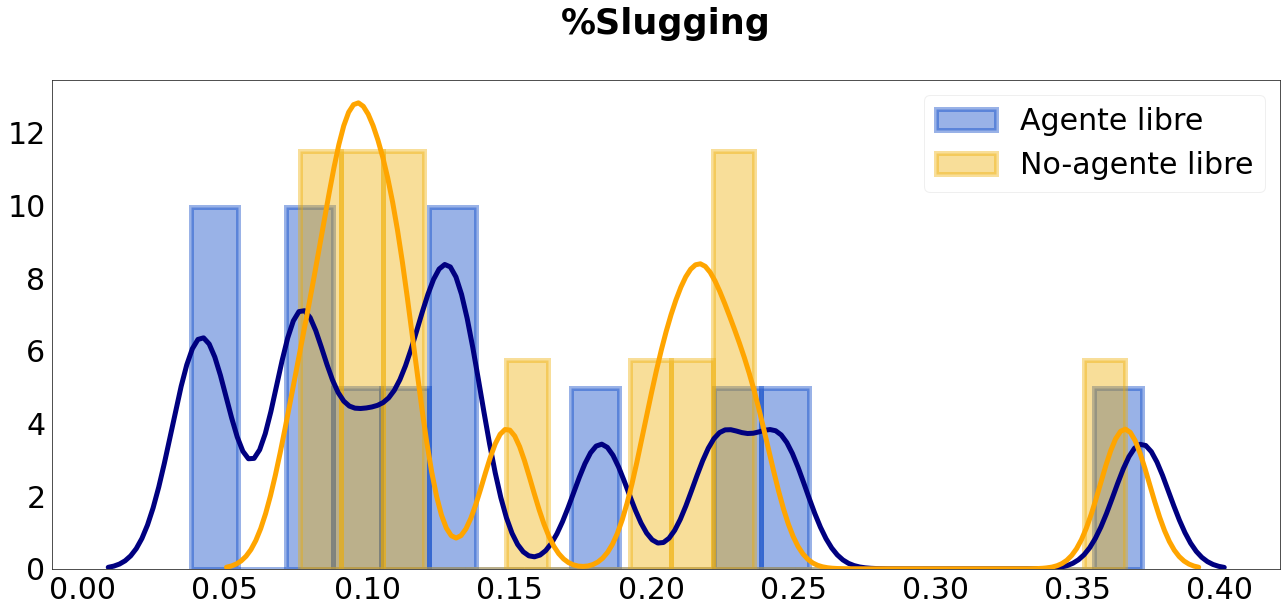

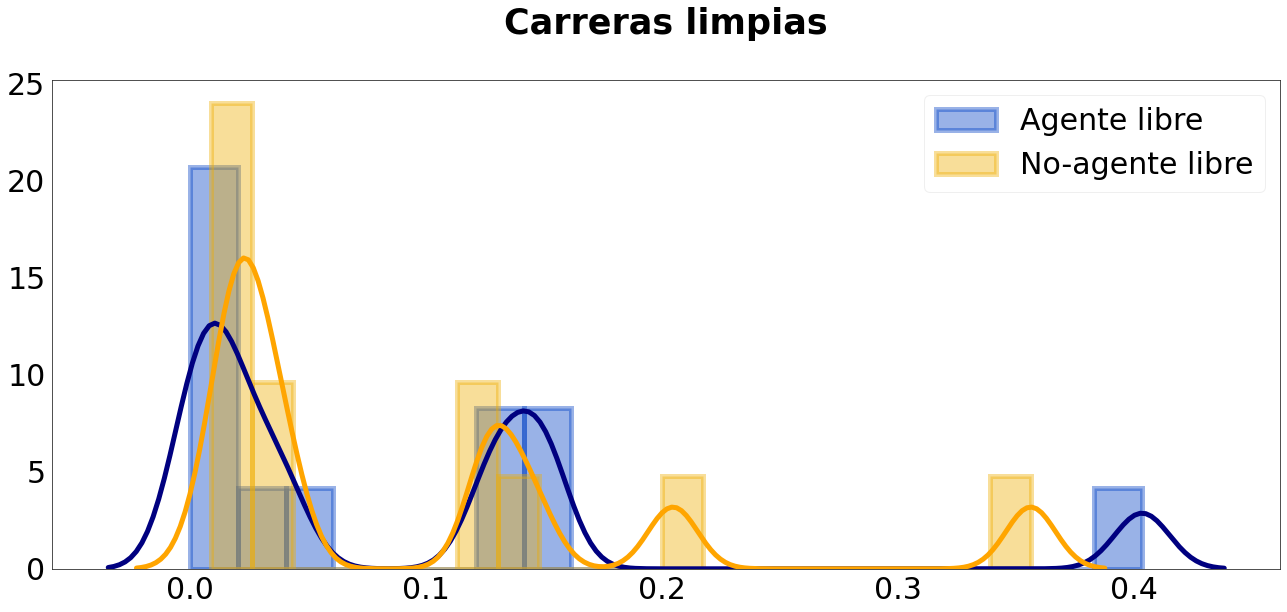

In [27]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    g = sns.distplot(mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'Si'][hitter_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (0/255,64/255,196/255,0.7),
                                 'edgecolor': (0/255,64/255,196/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "navy",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'Agente libre')
    g = sns.distplot(mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'No'][hitter_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (239/255,173/255,1/255,0.8),
                                 'edgecolor': (239/255,173/255,1/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "orange",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'No-agente libre')
    g.set_title(hitter_labels[i] + '\n',
                fontsize = 35,
                fontweight = 'bold',
                color = 'black')
    g.set_xlabel('Temporadas',
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    g.set_ylabel(hitter_labels[i], 
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    legend = plt.legend(loc = 'best', 
                        labelcolor = 'black',
                        fontsize = 30,
                        facecolor = 'white',
                        framealpha = 0.3,
                        fancybox = True,
                        frameon = True)
    g.set(xlabel = None)
    g.set(ylabel = None)
    g.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Density_plot/Per_Game/density_hitter_" + str(hitter_labels_save[i]).lower() + ".pdf",
                format = "pdf")

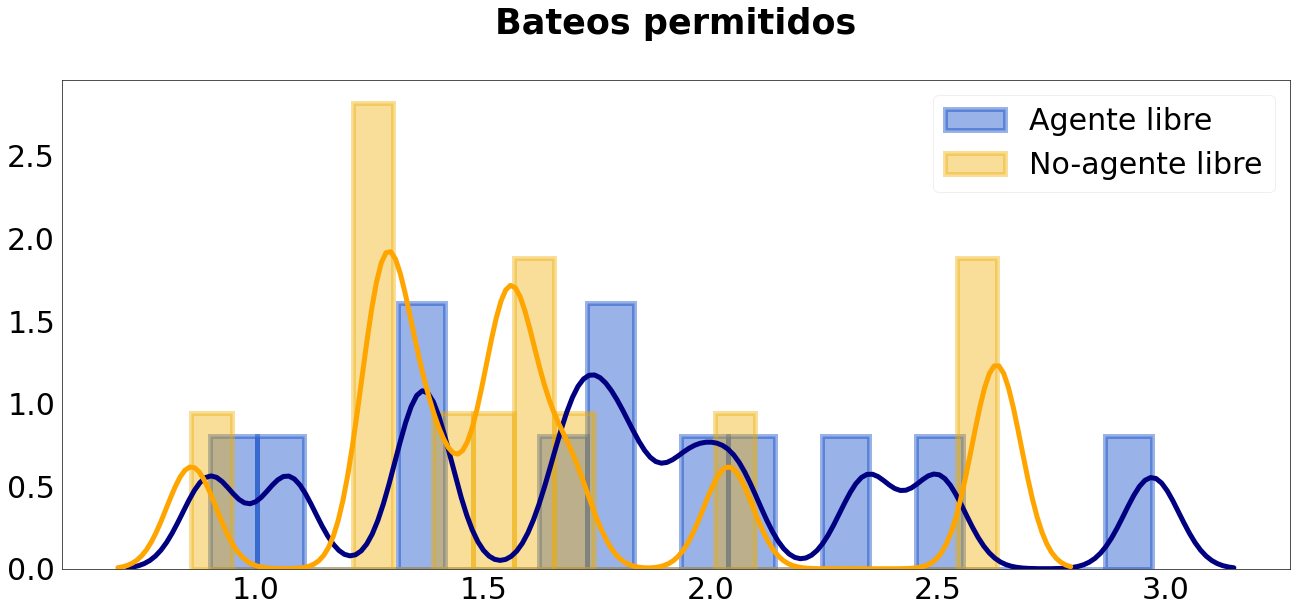

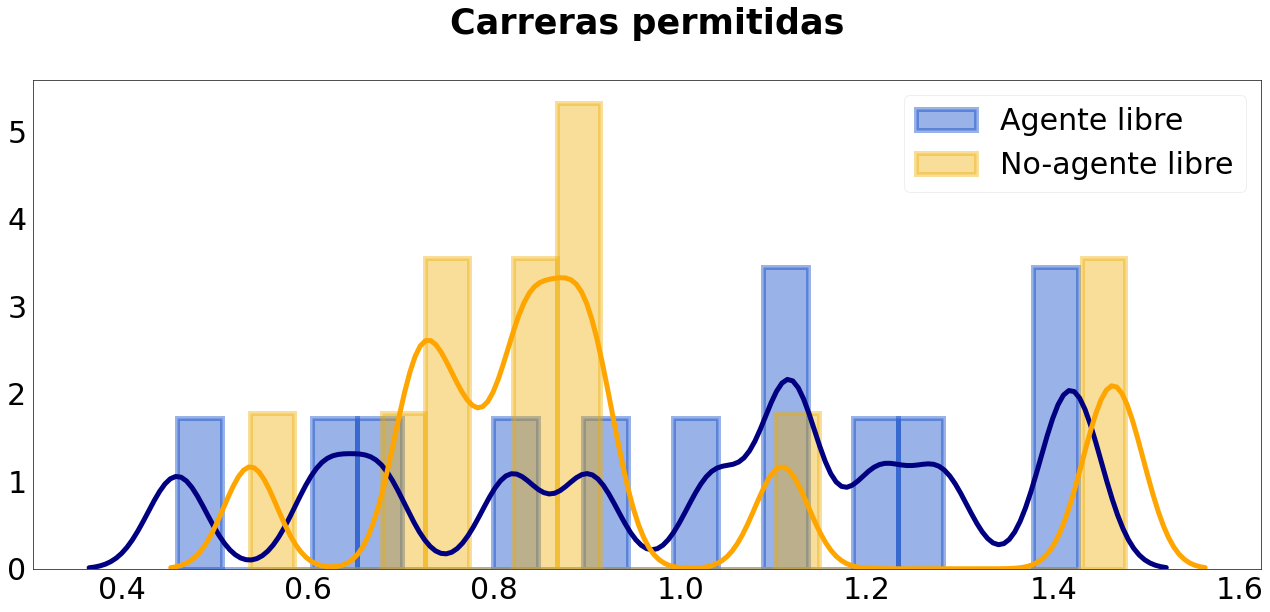

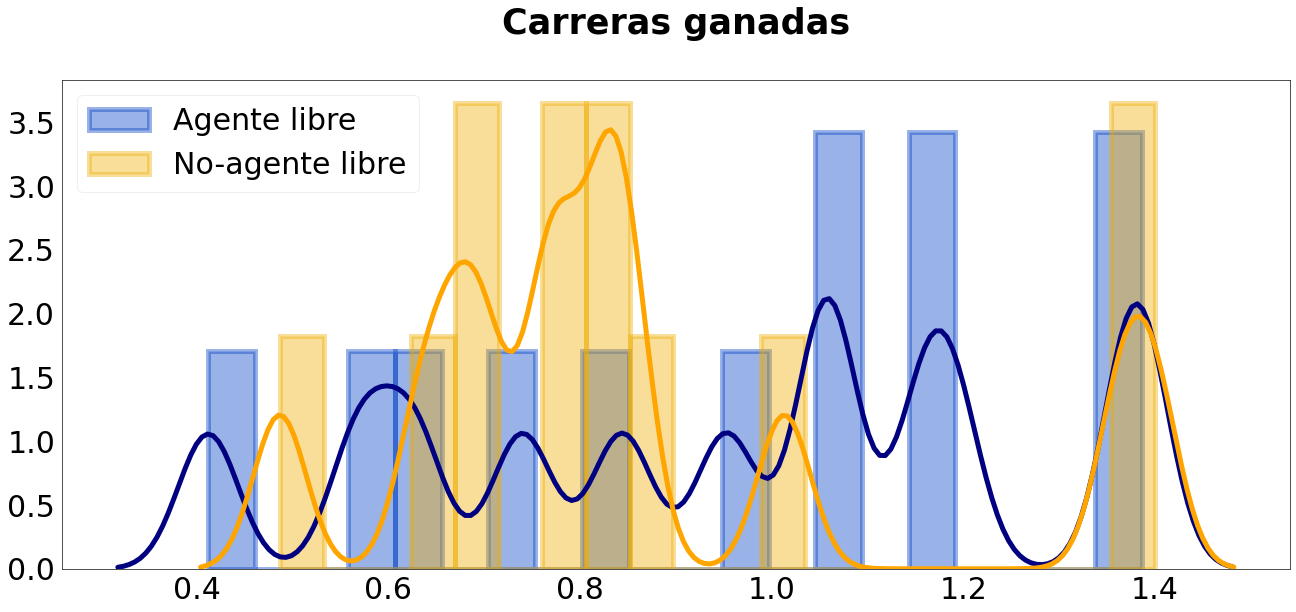

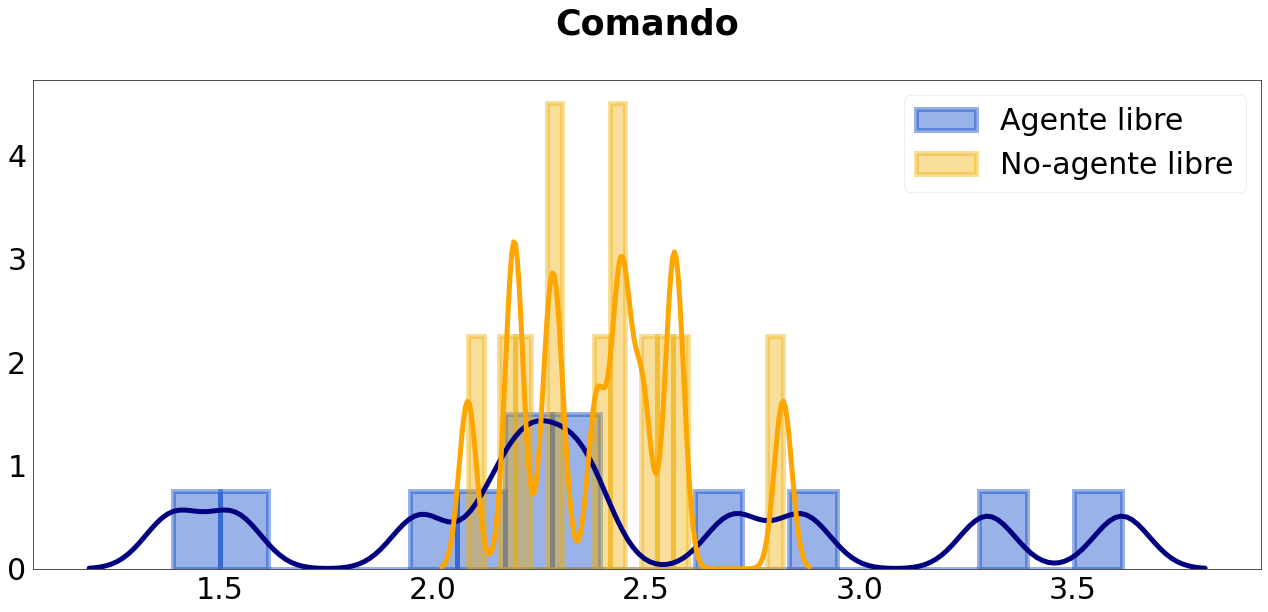

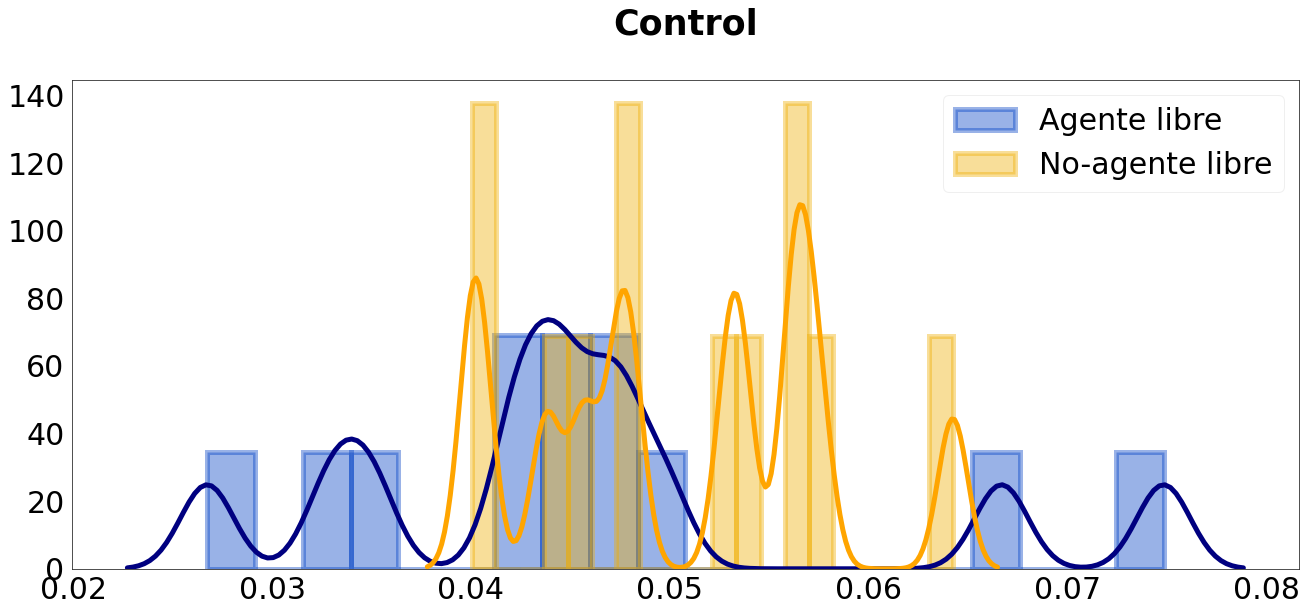

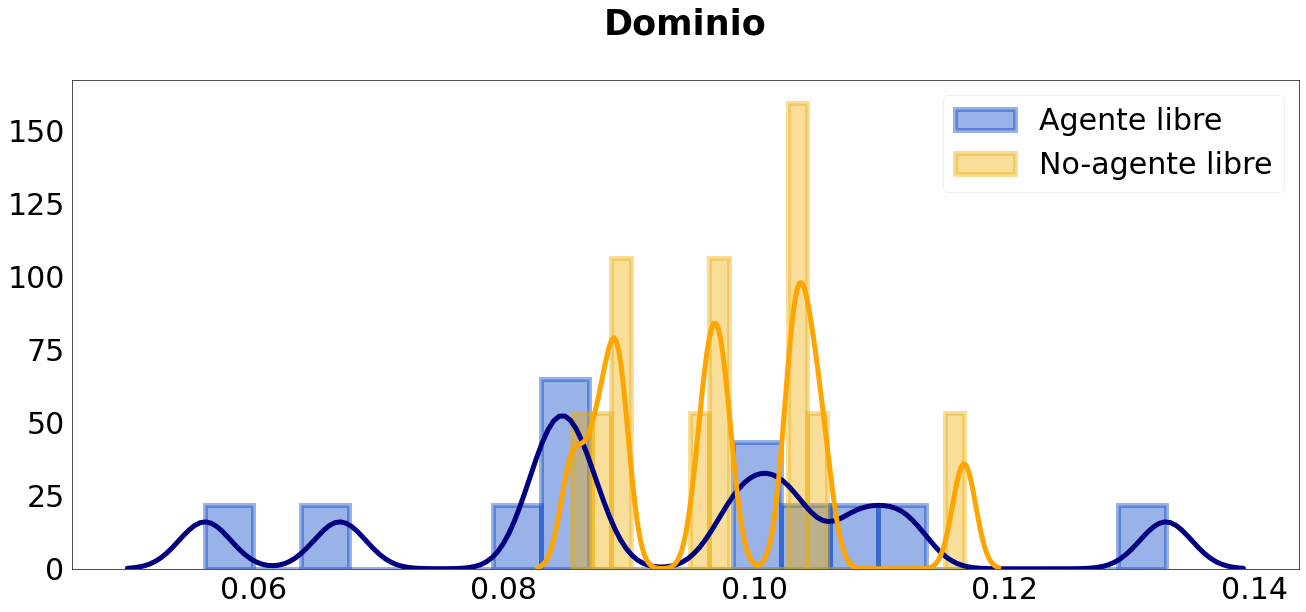

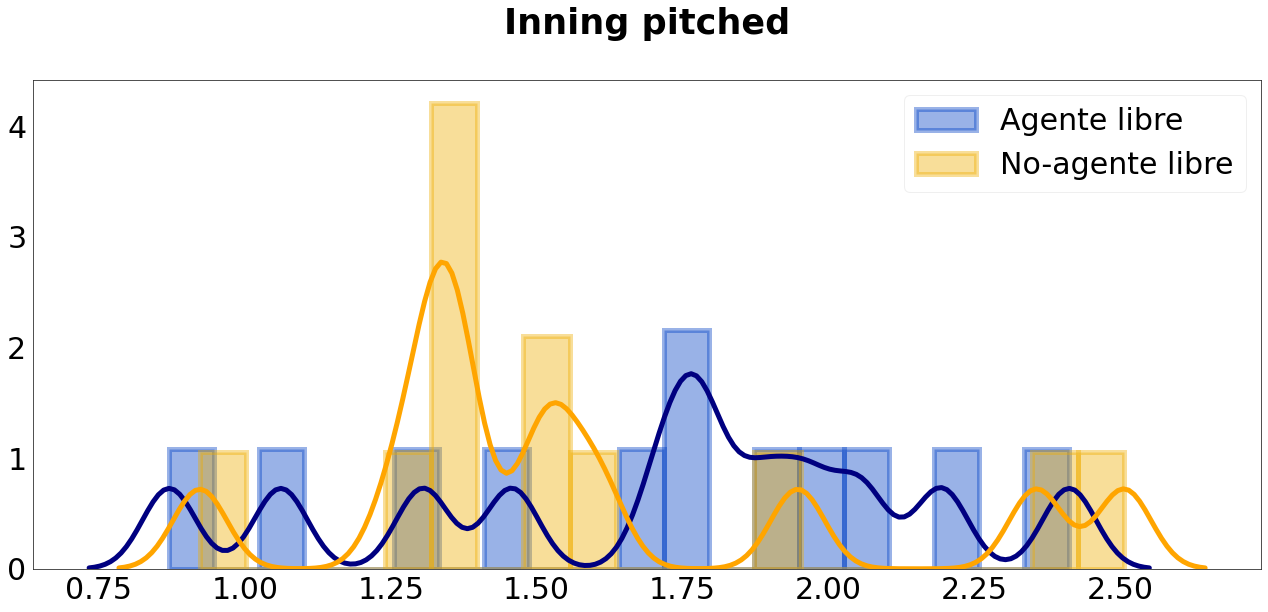

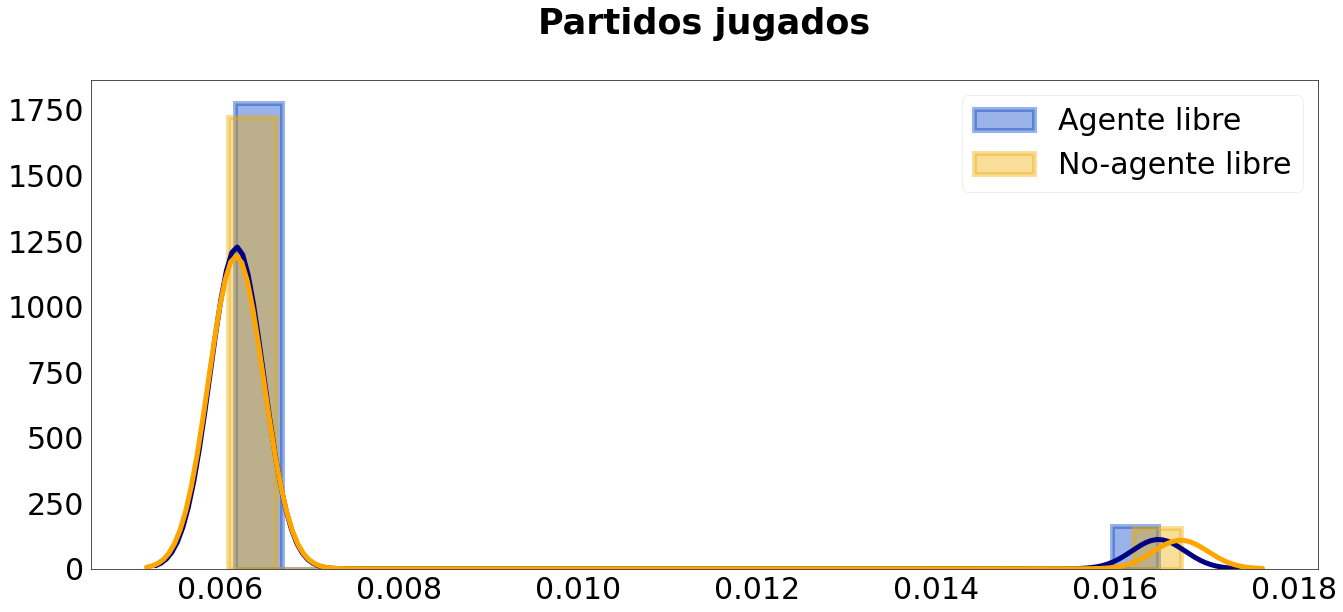

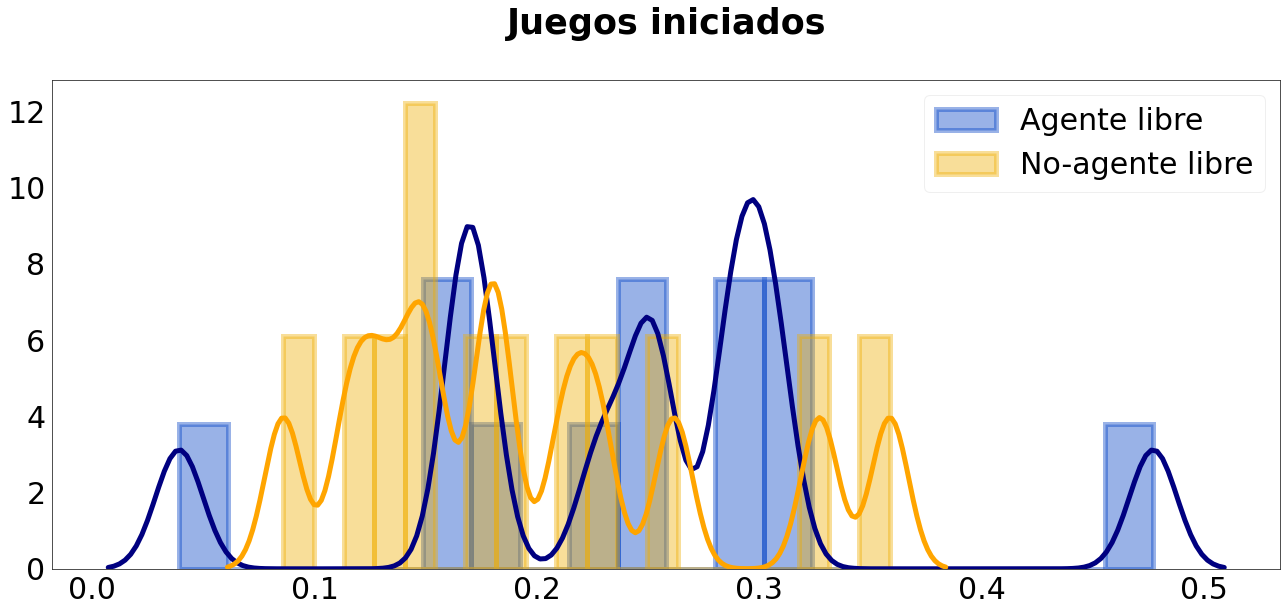

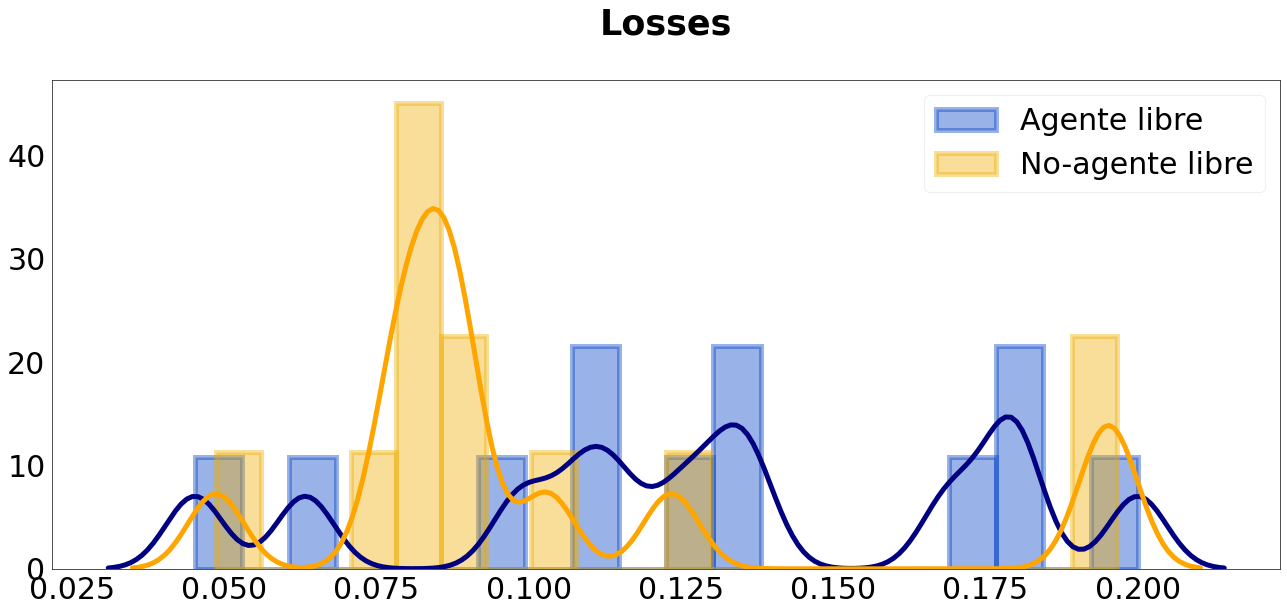

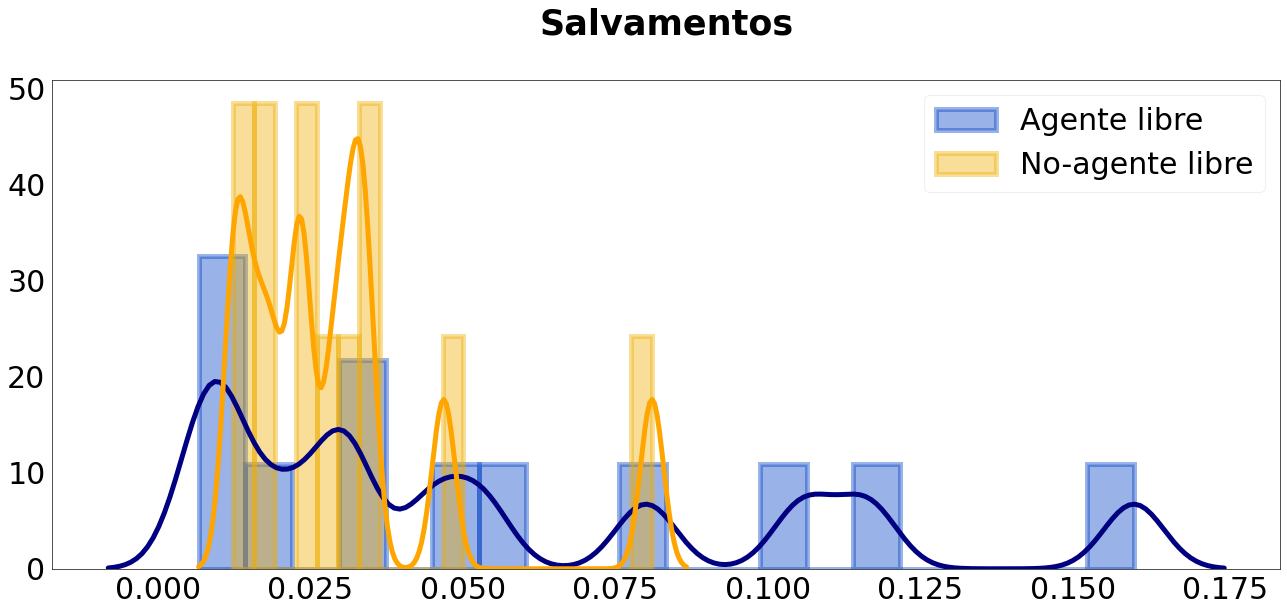

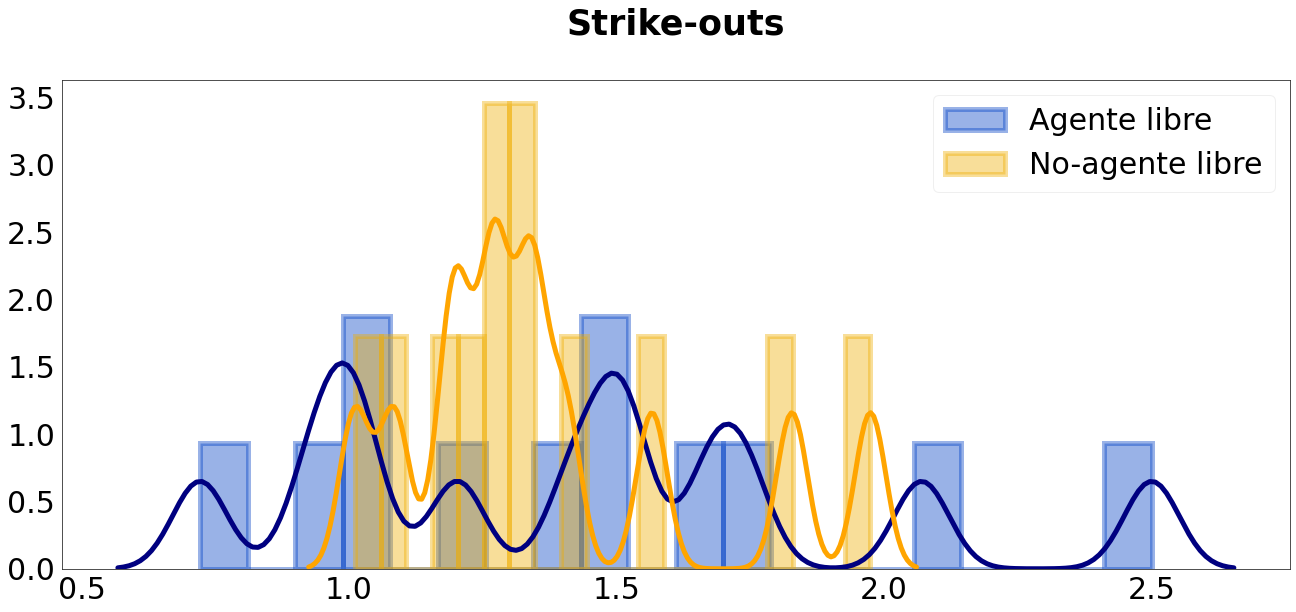

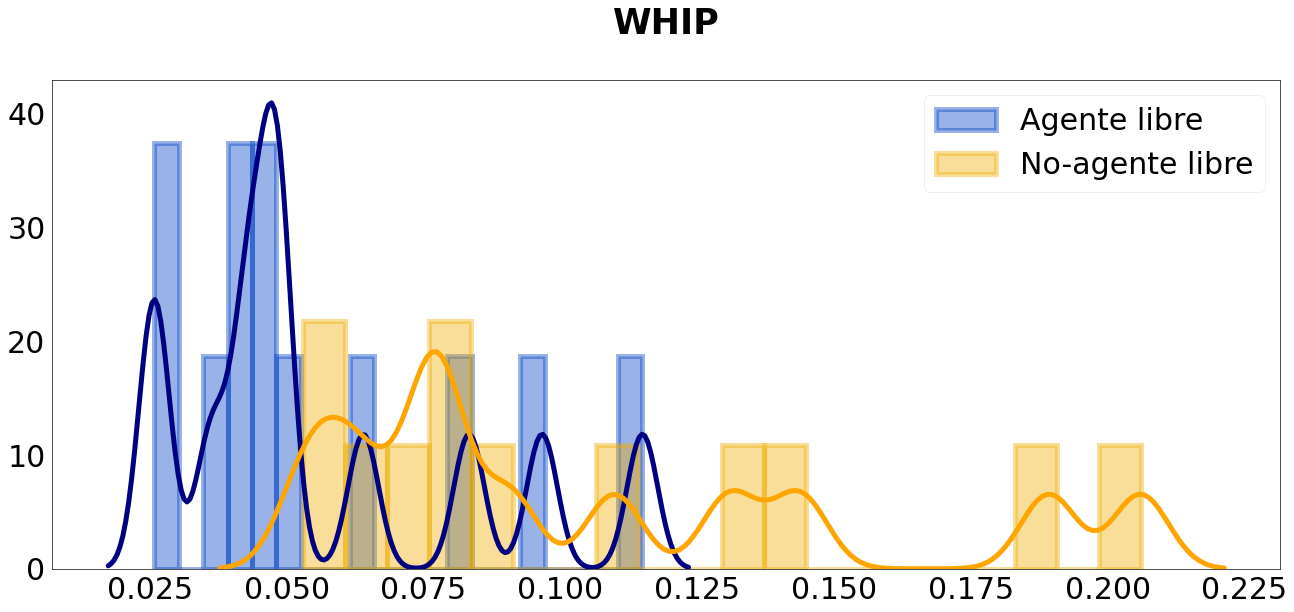

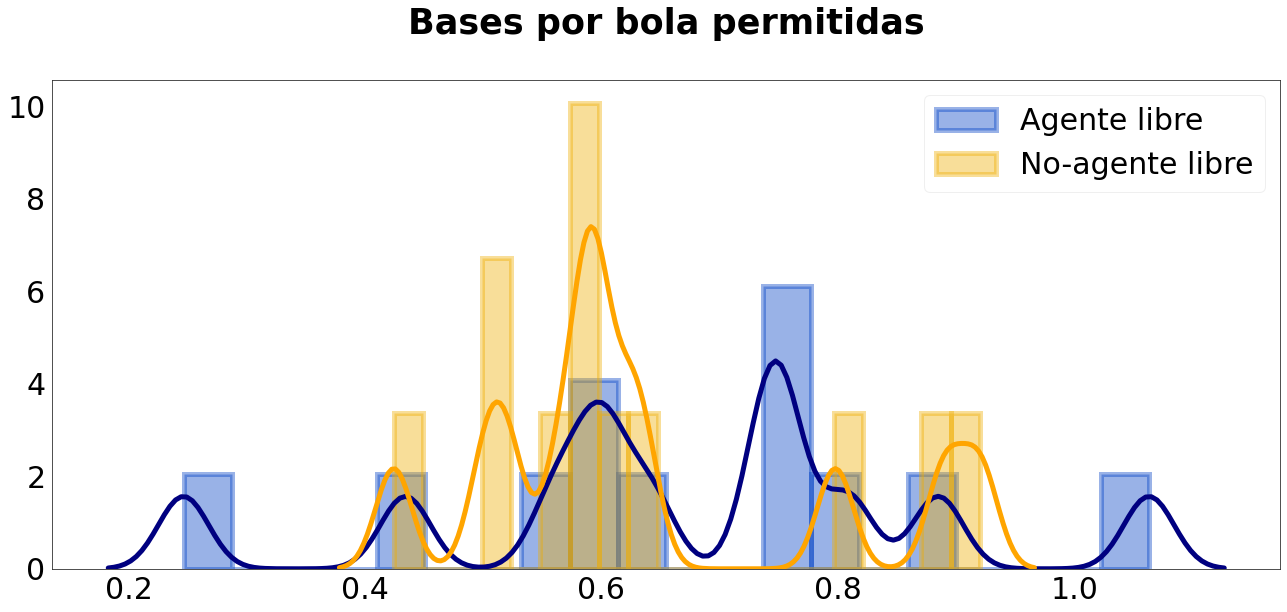

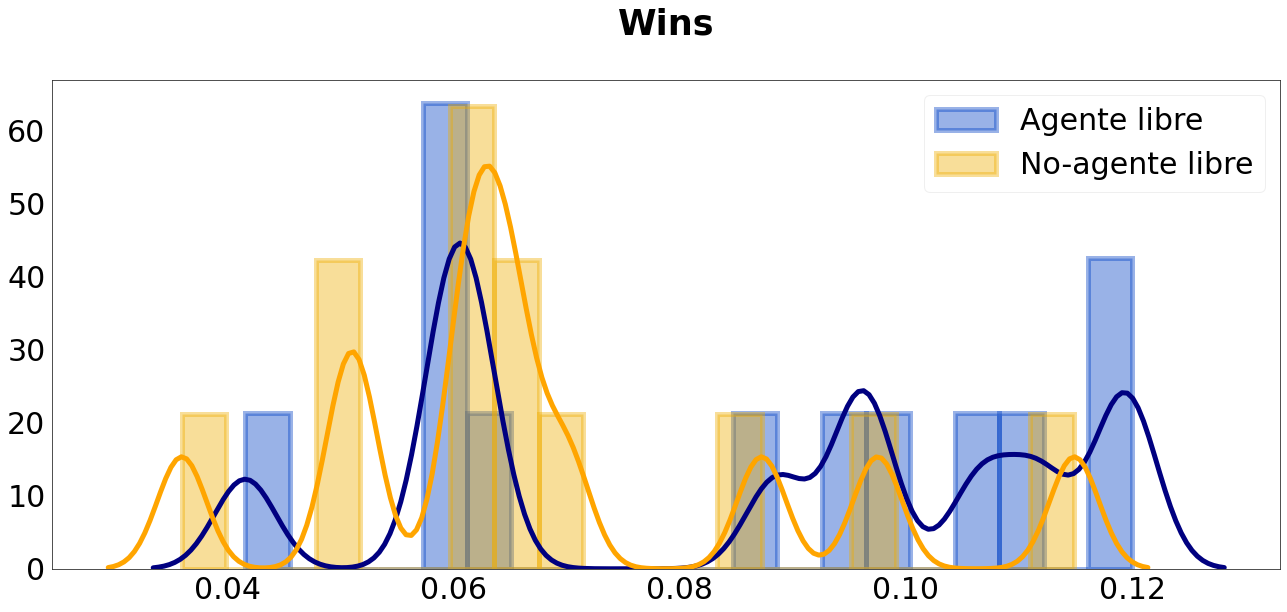

In [28]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    g = sns.distplot(mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'Si'][pitcher_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (0/255,64/255,196/255,0.7),
                                 'edgecolor': (0/255,64/255,196/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "navy",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'Agente libre')
    g = sns.distplot(mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'No'][pitcher_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (239/255,173/255,1/255,0.8),
                                 'edgecolor': (239/255,173/255,1/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "orange",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'No-agente libre')
    g.set_title(pitcher_labels[i] + '\n',
                fontsize = 35,
                fontweight = 'bold',
                color = 'black')
    g.set_xlabel('Temporadas',
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    g.set_ylabel(pitcher_labels[i], 
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    legend = plt.legend(loc = 'best', 
                        labelcolor = 'black',
                        fontsize = 30,
                        facecolor = 'white',
                        framealpha = 0.3,
                        fancybox = True,
                        frameon = True)
    g.set(xlabel = None)
    g.set(ylabel = None)
    g.patch.set_facecolor('white')
    
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Density_plot/Per_Game/density_pitcher_" + str(pitcher_labels_save[i]).lower() + ".pdf",
                format = "pdf")